# Supplementary Fig. 8a: Chromosome fusions in *Xenopus laevis* and *Hymenochirus boettgeri*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import pysam
import datetime
import matplotlib as mpl
import matplotlib.cm as cm
import re

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

%matplotlib inline 

Mb= 1000000
min_num_reads  = 15
min_z_score    = 4

colors_dict = {0:'red',1:'gray',2:'green',3:'black',4:'blue',5:'purple', 6:'orange',7:'brown'}


Specie_id      = 'XL9_2'
Specie_name    = 'X. laevis'
chr_index      = '~/SAPS/X_laevis_old/2_RepeatMasker/XL9_2.repeatMasked.fa.fai'
path_densities = '~/SAPS/X_tropicalis_V10_Final/Density_species/'
out_dir        = '~/SAPS/X_tropicalis_V10_Final/Density_species/Figures/'

chr_sizes           = pd.read_csv(chr_index, names=['Chr','Length','A','B','C'], sep='\t')
chr_sizes           = chr_sizes[chr_sizes.Chr.str.startswith('Chr')]
ordered_chromosomes = natural_sort(copy.copy(chr_sizes.Chr.unique()))

Specie_name = ''.join((Specie_id[0],'. ', Specie_id[1:]))
Xtro_file_GC                    = ''.join((path_densities,Specie_id,'.GC_Density_W1Mb_50Kb.tab'))
Xtropicalis_repeat_Motif_file   = ''.join((path_densities,Specie_id,'.Repeat_Motif_Density_W1Mb_50Kb.tab'))
Xtropicalis_repeat_Class_file   = ''.join((path_densities,Specie_id,'.Repeat_Class_Density_W1Mb_50Kb.tab'))

Xtropicalis_GC                  = pd.read_csv(Xtro_file_GC,sep='\t')
Xtropicalis_repeat_Motif        = pd.read_csv(Xtropicalis_repeat_Motif_file, sep='\t')
Xtropicalis_repeat_Class        = pd.read_csv(Xtropicalis_repeat_Class_file, sep='\t')

Xtropicalis_repeat_Class_and_GC = pd.merge(Xtropicalis_GC,Xtropicalis_repeat_Motif, on=['Chr','position'])
non_overlapping_reps            = Xtropicalis_repeat_Class.columns[~(Xtropicalis_repeat_Class.columns.isin(Xtropicalis_repeat_Class_and_GC.columns))].tolist()
Xtropicalis_repeat_Class_and_GC = pd.merge(Xtropicalis_repeat_Class_and_GC,Xtropicalis_repeat_Class[['Chr','position'] + non_overlapping_reps], on=['Chr','position'])

list_of_repeats     = Xtropicalis_repeat_Class_and_GC.T[3:].index.tolist()
Repeat_Classes_list = non_overlapping_reps

Xtropicalis_repeat_Class_and_GC_norm  = copy.copy(Xtropicalis_repeat_Class_and_GC[list_of_repeats]).T
Xtropicalis_repeat_Class_and_GC_norm = ((Xtropicalis_repeat_Class_and_GC_norm - Xtropicalis_repeat_Class_and_GC_norm.mean())/ Xtropicalis_repeat_Class_and_GC_norm.std())

#### Obtain Z-score of repeat density per chromosome:
tmp_all = copy.copy(Xtropicalis_repeat_Class_and_GC)
Xtropicalis_repeat_Class_and_GC_norm_byChr = pd.DataFrame()
for Chr_ in ordered_chromosomes:
    print Chr_
    tmp_df  = copy.copy(tmp_all.loc[tmp_all.Chr==Chr_, ['GC%']+ list_of_repeats])
    example = pd.DataFrame(((tmp_df.T - tmp_df.T.mean())/ tmp_df.T.std())).T
    Xtropicalis_repeat_Class_and_GC_norm_byChr = Xtropicalis_repeat_Class_and_GC_norm_byChr.append(example)
Xtropicalis_repeat_Class_and_GC_norm_byChr =  Xtropicalis_repeat_Class_and_GC_norm_byChr.fillna(0)
Xtropicalis_repeat_Class_and_GC_norm_byChr = pd.merge(Xtropicalis_repeat_Class_and_GC[['Chr','position']],Xtropicalis_repeat_Class_and_GC_norm_byChr, left_index=True, right_index=True)
print Xtropicalis_repeat_Class_and_GC_norm_byChr.shape
Xtropicalis_repeat_Class_and_GC_norm_byChr.head()


Chr1L
Chr1S
Chr2L
Chr2S
Chr3L
Chr3S
Chr4L
Chr4S
Chr5L
Chr5S
Chr6L
Chr6S
Chr7L
Chr7S
Chr8L
Chr8S
Chr9_10L
Chr9_10S
(49805, 5238)


Chr  position       GC%  Xbo-2_family-40  Xla-1_family-1  \
0  Chr1L         0  5.821130         0.790912        1.865824   
1  Chr1L     50000  5.762514         1.089572        1.394438   
2  Chr1L    100000  5.625686         1.066012        1.364724   
3  Chr1L    150000  5.449851         1.034987        1.761584   
4  Chr1L    200000  5.425256         1.029422        1.607590   

   Xla-1_family-140  Xbo-6_family-1333  Xla-1_family-15  Xtr-4_family-702  \
0          3.094296           0.944471         2.172942          1.098030   
1          2.766333           0.937140         2.156602          1.242005   
2          2.858280           1.215368         2.559569          1.215368   
3          2.924139           1.325626         2.924139          1.325626   
4          2.763926           1.463048         2.908468          1.173964   

   Xla-6_family-282  ...  DNA/hAT-Pegasus  DNA/Ginger  DNA/Sola-3  \
0          4.015649  ...        -0.130442   -0.130442   -0.130442   
1          3.833362  ...        -0.129890   -0.129890   -0.129890   
2          4.053125  ...        -0.128833   -0.128833   -0.128833   
3          4.522652  ...        -0.127567   -0.127567   -0.127567   
4          5.076598  ...        -0.126913   -0.126913   -0.126913   

   Satellite/telo   SINE/B2  DNA/TcMar-Fot1  SINE/Alu   Crypton  \
0       -0.130442 -0.130442       -0.130442 -0.130442 -0.130442   
1       -0.129890 -0.129890       -0.129890 -0.129890 -0.129890   
2       -0.128833 -0.128833       -0.128833 -0.128833 -0.128833   
3       -0.127567 -0.127567       -0.127567 -0.127567 -0.127567   
4       -0.126913 -0.126913       -0.126913 -0.126913 -0.126913   

   SINE/tRNA-Deu   SINE/5S  
0      -0.130442 -0.130442  
1      -0.129890 -0.129890  
2      -0.128833 -0.128833  
3      -0.127567 -0.127567  
4      -0.126913 -0.126913  

[5 rows x 5238 columns]

In [4]:
Xtropicalis_repeat_Class_and_GC_norm_byChr.head()

Chr  position       GC%  Xbo-2_family-40  Xla-1_family-1  \
0  Chr1L         0  5.821130         0.790912        1.865824   
1  Chr1L     50000  5.762514         1.089572        1.394438   
2  Chr1L    100000  5.625686         1.066012        1.364724   
3  Chr1L    150000  5.449851         1.034987        1.761584   
4  Chr1L    200000  5.425256         1.029422        1.607590   

   Xla-1_family-140  Xbo-6_family-1333  Xla-1_family-15  Xtr-4_family-702  \
0          3.094296           0.944471         2.172942          1.098030   
1          2.766333           0.937140         2.156602          1.242005   
2          2.858280           1.215368         2.559569          1.215368   
3          2.924139           1.325626         2.924139          1.325626   
4          2.763926           1.463048         2.908468          1.173964   

   Xla-6_family-282  ...  DNA/hAT-Pegasus  DNA/Ginger  DNA/Sola-3  \
0          4.015649  ...        -0.130442   -0.130442   -0.130442   
1          3.833362  ...        -0.129890   -0.129890   -0.129890   
2          4.053125  ...        -0.128833   -0.128833   -0.128833   
3          4.522652  ...        -0.127567   -0.127567   -0.127567   
4          5.076598  ...        -0.126913   -0.126913   -0.126913   

   Satellite/telo   SINE/B2  DNA/TcMar-Fot1  SINE/Alu   Crypton  \
0       -0.130442 -0.130442       -0.130442 -0.130442 -0.130442   
1       -0.129890 -0.129890       -0.129890 -0.129890 -0.129890   
2       -0.128833 -0.128833       -0.128833 -0.128833 -0.128833   
3       -0.127567 -0.127567       -0.127567 -0.127567 -0.127567   
4       -0.126913 -0.126913       -0.126913 -0.126913 -0.126913   

   SINE/tRNA-Deu   SINE/5S  
0      -0.130442 -0.130442  
1      -0.129890 -0.129890  
2      -0.128833 -0.128833  
3      -0.127567 -0.127567  
4      -0.126913 -0.126913  

[5 rows x 5238 columns]

### Centromere and Telomeres were defined as the point where the z-score  > 90%tile 

In [5]:
# What we need to do to identify the telomeric boundaries is to select the regions enriched by SAT repeats. Divide the chromosome in 2 halves and select the max position on the  left and the min position from the right.
#identiy midpoints:
chr_sizes['midpoint'] = (chr_sizes.Length/2).astype(int)
Xtropicalis_repeat_Class_and_GC_norm_byChr['Region'] = 'arm'

Tel_rep = 'SAT-1_XL'
Cen_rep = 'L1'
for Chr_ in ordered_chromosomes:
    quantile_Tel = Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_)][Tel_rep].quantile(.97)
    #z_half = (Xtropicalis_repeat_Class_and_GC_norm_byChr.loc[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_,[Tel_rep]].max().max() - Xtropicalis_repeat_Class_and_GC_norm_byChr.loc[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_,[Tel_rep]].min().min())/2
    tmp_df = np.array(Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr[Tel_rep]>quantile_Tel)].position)
    midpoint = chr_sizes.loc[chr_sizes.Chr==Chr_].midpoint.tolist()[0]
    if len(tmp_df[tmp_df<midpoint]) >0:
        min_reg = tmp_df[tmp_df<midpoint].max()+Mb
    else: min_reg = 0
    if len(tmp_df[tmp_df>midpoint]) >0:
        max_reg = tmp_df[tmp_df>midpoint].min()-Mb
    else: max_reg = Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].position.max().max()
    min_reg,max_reg
    Xtropicalis_repeat_Class_and_GC_norm_byChr.loc[((Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & ((Xtropicalis_repeat_Class_and_GC_norm_byChr.position<min_reg)| (Xtropicalis_repeat_Class_and_GC_norm_byChr.position>max_reg))), 'Region'] = 'Telomere'
    
    quantile_Cen = Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_)][Cen_rep].quantile(.95)
    Xtropicalis_repeat_Class_and_GC_norm_byChr.loc[((Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr[Cen_rep]>quantile_Cen)), 'Region'] = 'Centromere'  
    

Xtropicalis_repeat_Class_and_GC['Region'] = Xtropicalis_repeat_Class_and_GC_norm_byChr.Region


#### Plot GC%, L1, and SAT

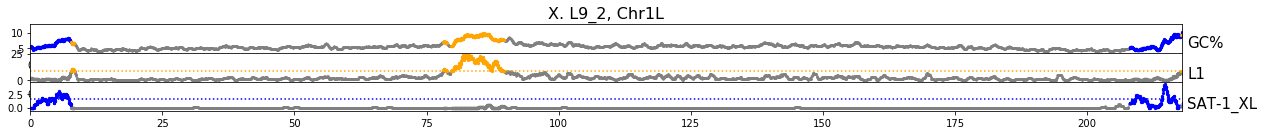

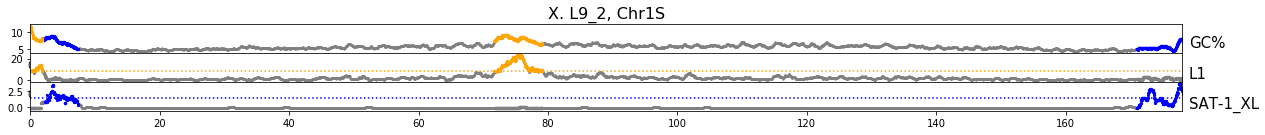

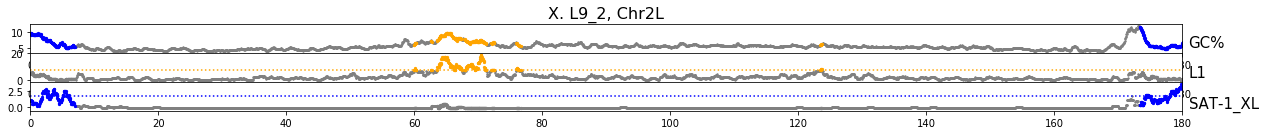

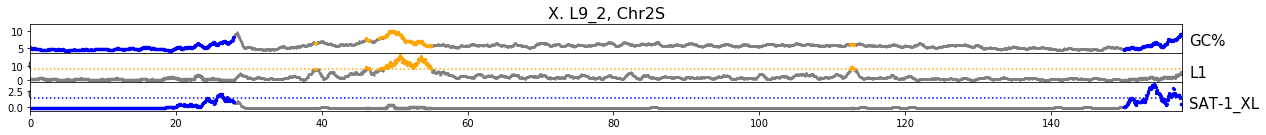

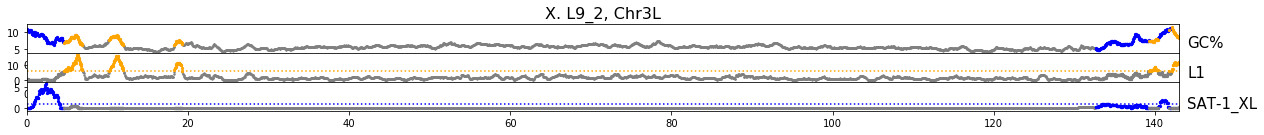

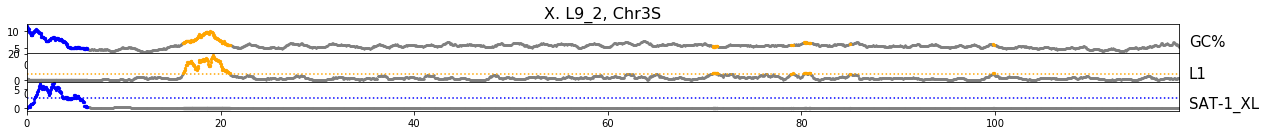

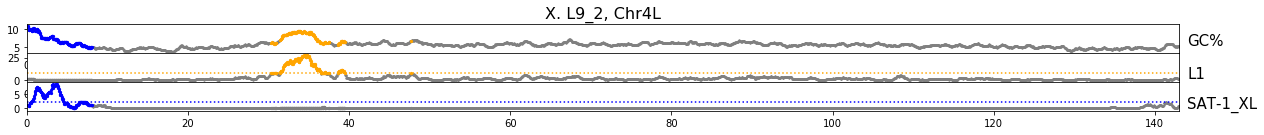

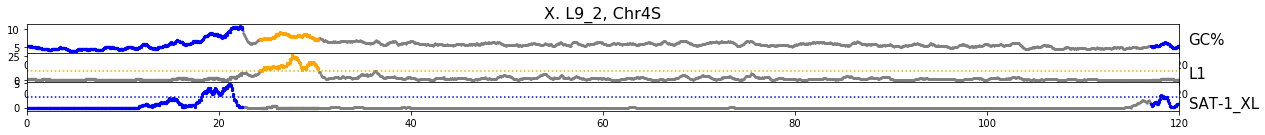

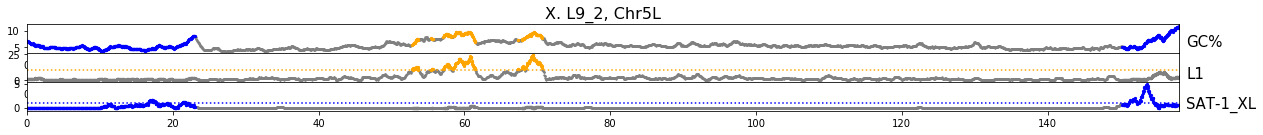

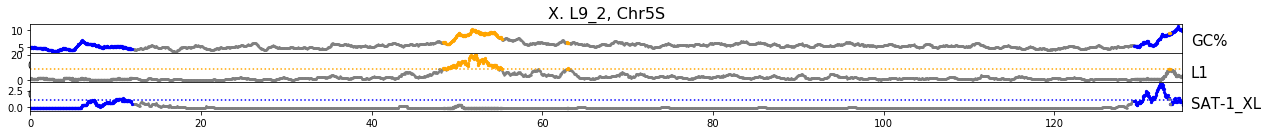

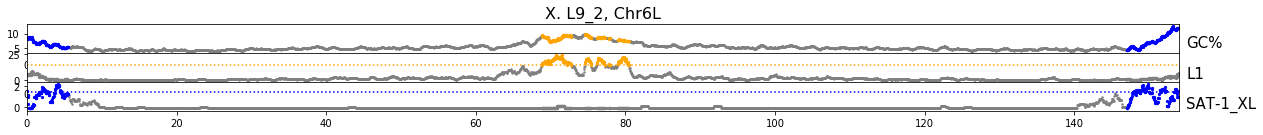

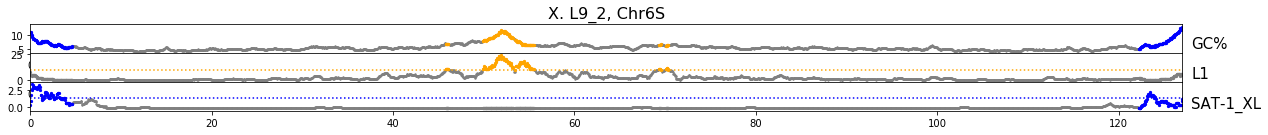

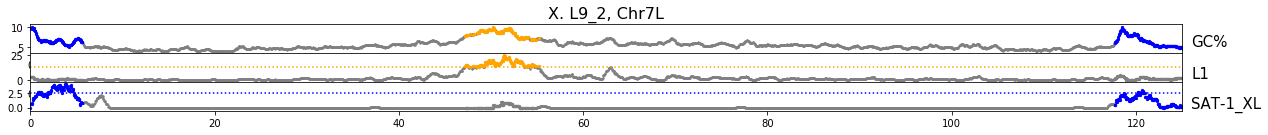

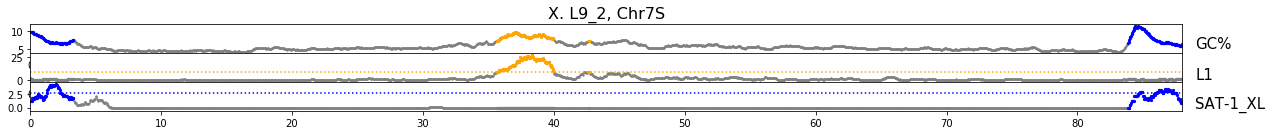

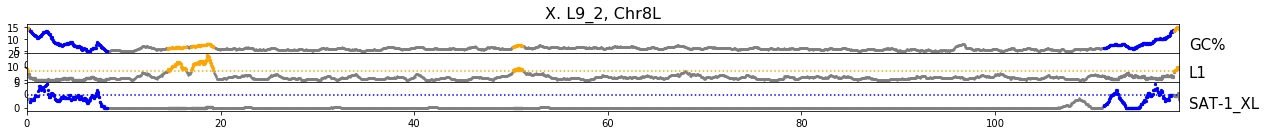

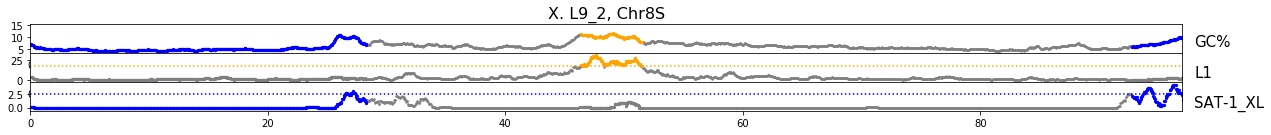

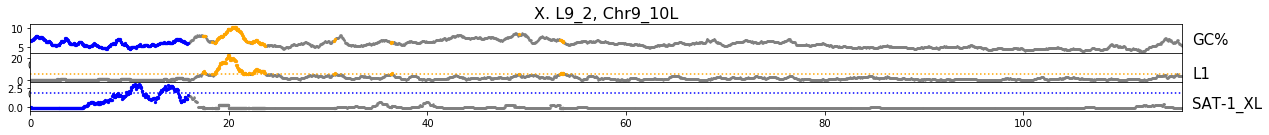

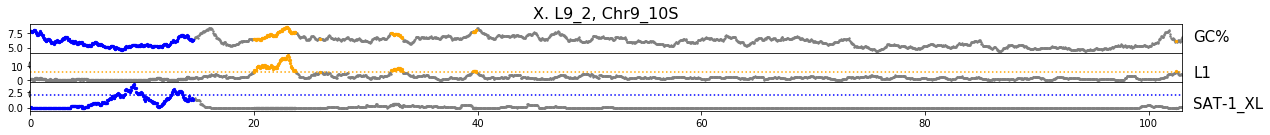

In [6]:
for Chr_ in ordered_chromosomes:
    fig = plt.figure(figsize=(20,1))
    ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.4])#,xticklabels=[], ylim=(-1.2, 1.2))
    rep_type ='GC%'
    plt.title(''.join((Specie_name, ', ',Chr_)), fontsize=16)
    max_pos = Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC.Chr==Chr_) ]['position'].max()/Mb
    plt.xlim(0,max_pos)
    ax1.text(max_pos+1,Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='arm')][rep_type].mean(),rep_type, fontsize=15)
    ax1.scatter(Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='arm')]['position']/Mb, Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='arm')][rep_type],c='gray',s=2, label='arm')
    ax1.scatter(Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Telomere')]['position']/Mb, Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Telomere')][rep_type],c='blue', s=5,label='Telomere')
    ax1.scatter(Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Centromere')]['position']/Mb, Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Centromere')][rep_type],c='orange', s=5,label='Centromere')
    
    ax2 = fig.add_axes([0.1, 0.5, 0.8, 0.4])#,xticklabels=[], ylim=(-1.2, 1.2))
    rep_type ='L1'
    plt.xlim(0,max_pos)
    quantile_Cen = Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_)][Cen_rep].quantile(.95)
    ax2.text(max_pos+1,Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='arm')][rep_type].mean(),rep_type, fontsize=15)
    ax2.scatter(Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='arm')]['position']/Mb, Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='arm')][rep_type],c='gray',s=2, label='arm')
    ax2.scatter(Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Telomere')]['position']/Mb, Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Telomere')][rep_type],c='gray', s=5,label='Telomere')
    ax2.scatter(Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Centromere')]['position']/Mb, Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Centromere')][rep_type],c='orange', s=5,label='Centromere')
    ax2.axhline(quantile_Cen,c='orange', linestyle = ":")
    ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.4])#,xticklabels=[], ylim=(-1.2, 1.2))
    
    rep_type =Tel_rep
    plt.xlim(0,max_pos)
    quantile_Tel = Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_)][Tel_rep].quantile(.97)
    ax3.text(max_pos+1,Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='arm')][rep_type].mean(),rep_type, fontsize=15)
    ax3.scatter(Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='arm')]['position']/Mb, Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='arm')][rep_type],c='gray',s=2, label='arm')
    ax3.scatter(Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Telomere')]['position']/Mb, Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Telomere')][rep_type],c='blue', s=5,label='Telomere')
    ax3.scatter(Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Centromere')]['position']/Mb, Xtropicalis_repeat_Class_and_GC_norm_byChr[(Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_) & (Xtropicalis_repeat_Class_and_GC_norm_byChr.Region=='Centromere')][rep_type],c='gray', s=5,label='Centromere')
    ax3.axhline(quantile_Tel,c='blue', linestyle = ":")
    
    fig_name=''.join((out_dir,Specie_id,'_',Chr_,'_GC_L1_SAT.png'))
    
    #plt.savefig(fig_name, dpi=200, bbox_inches='tight' )
    plt.show()

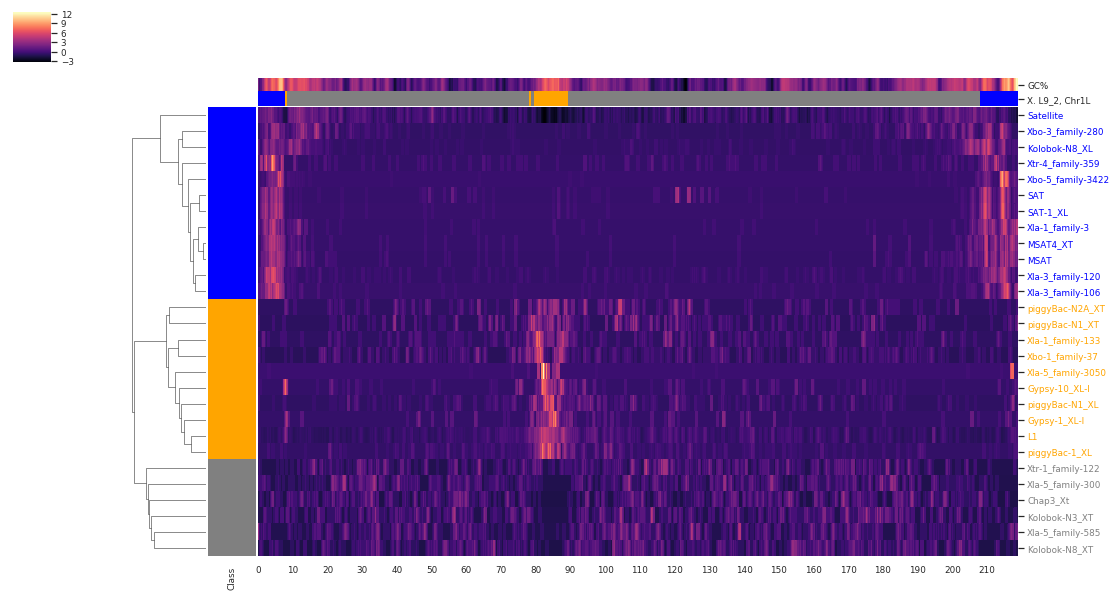

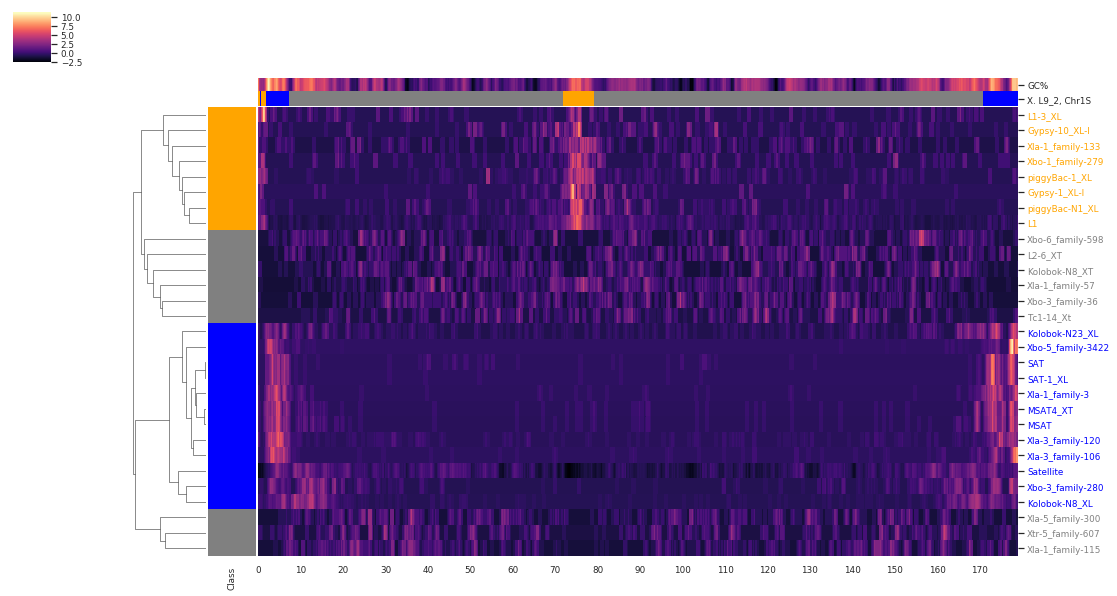

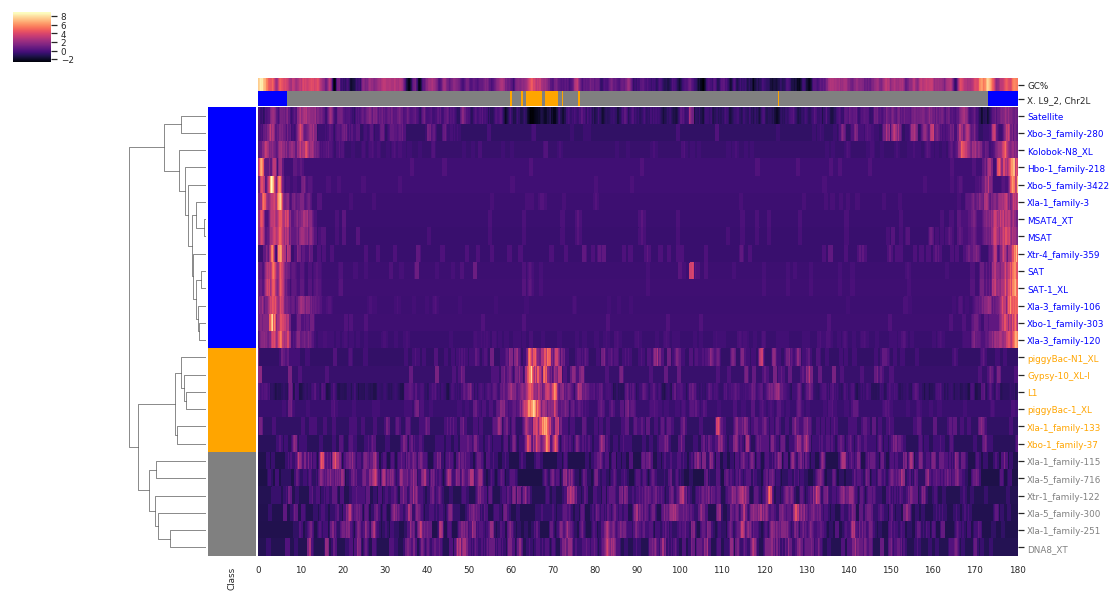

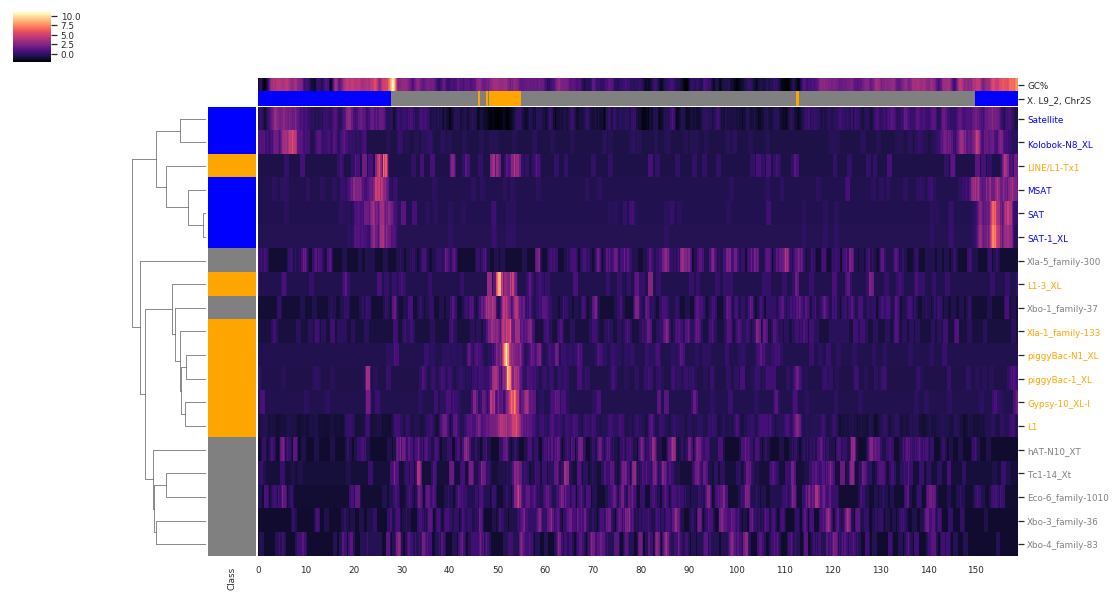

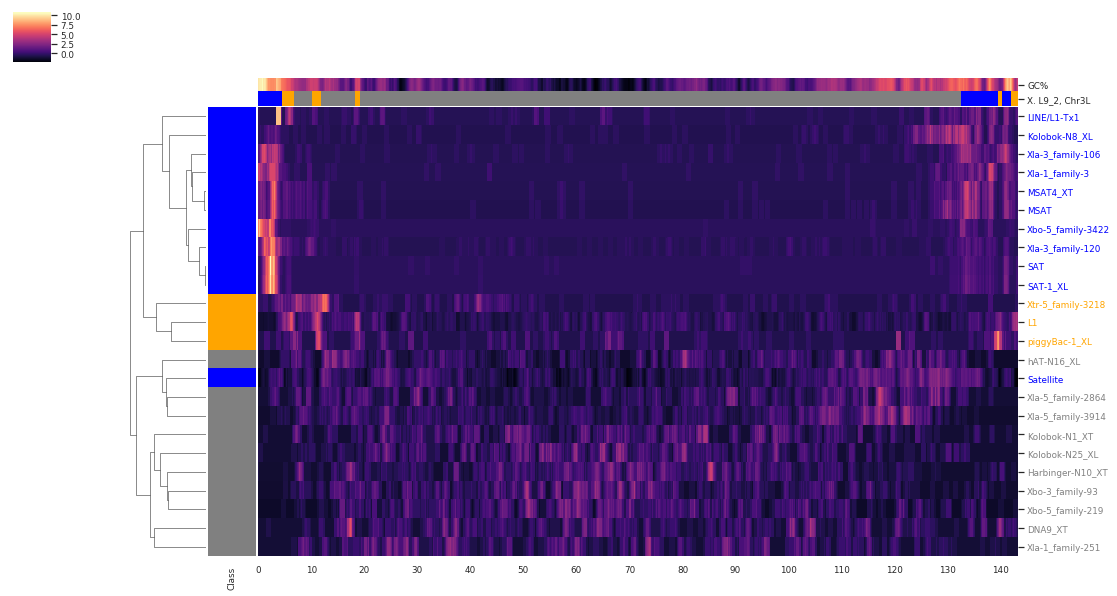

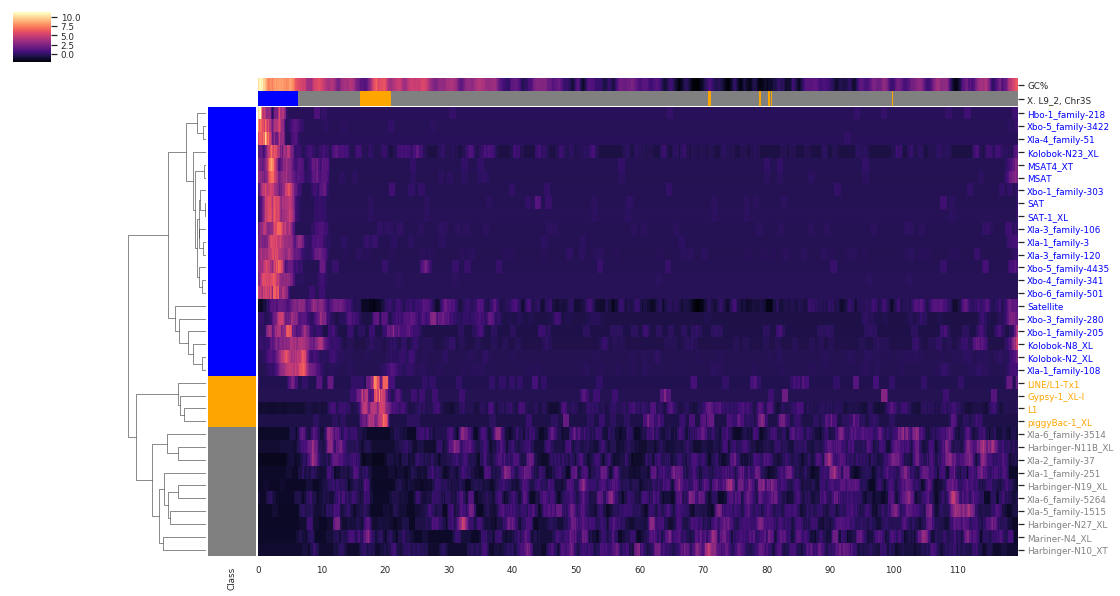

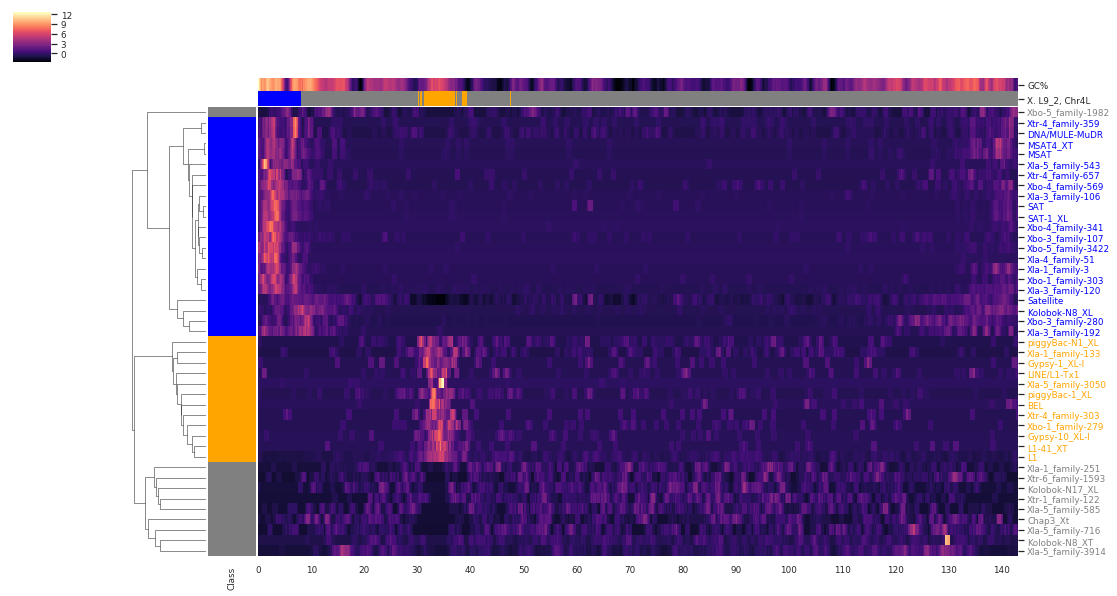

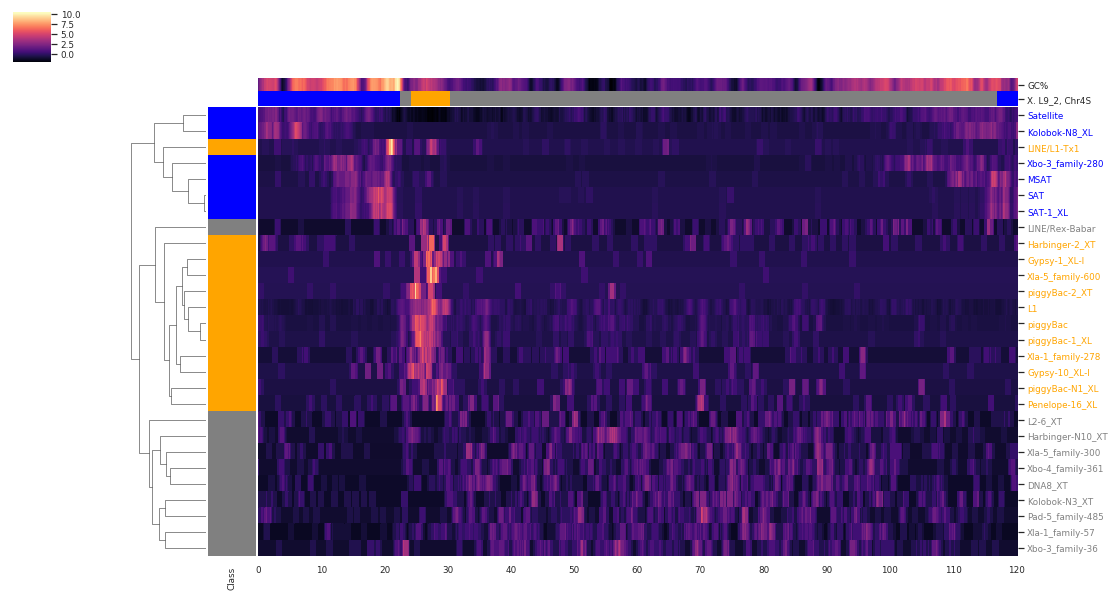

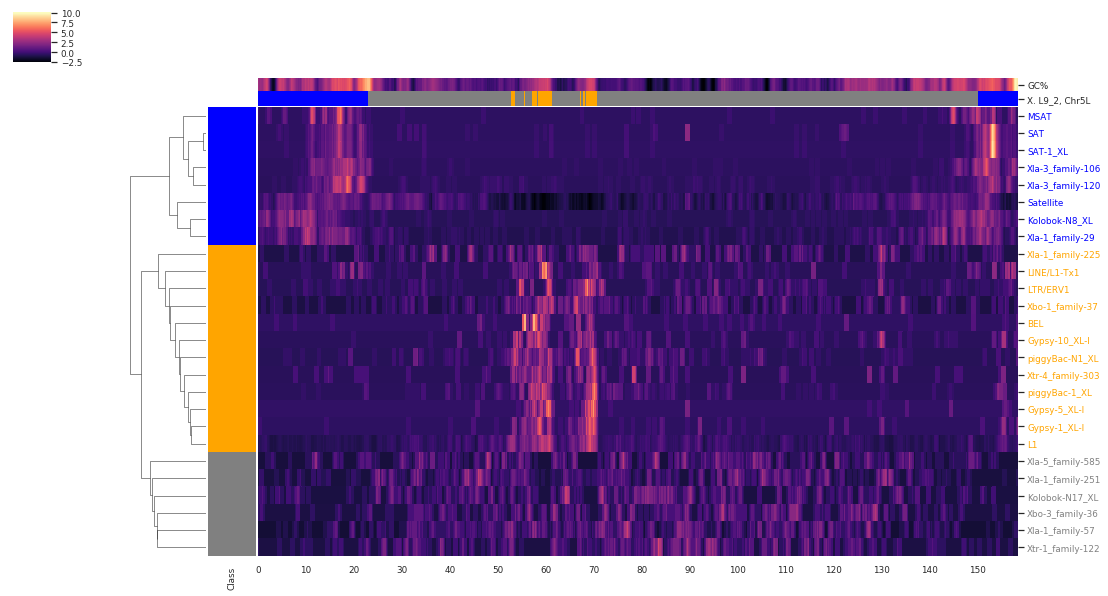

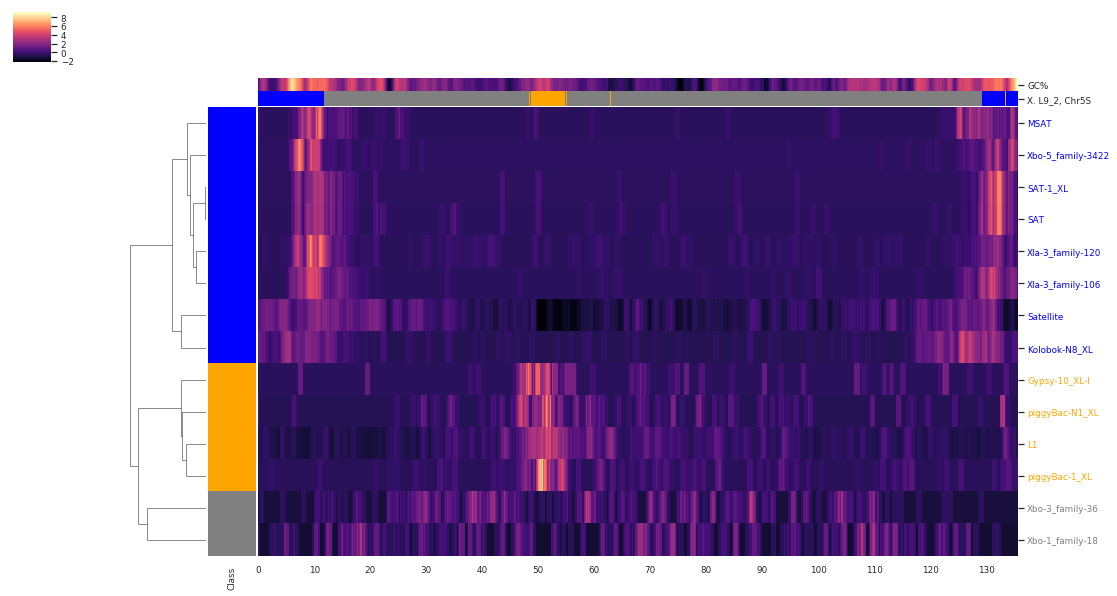

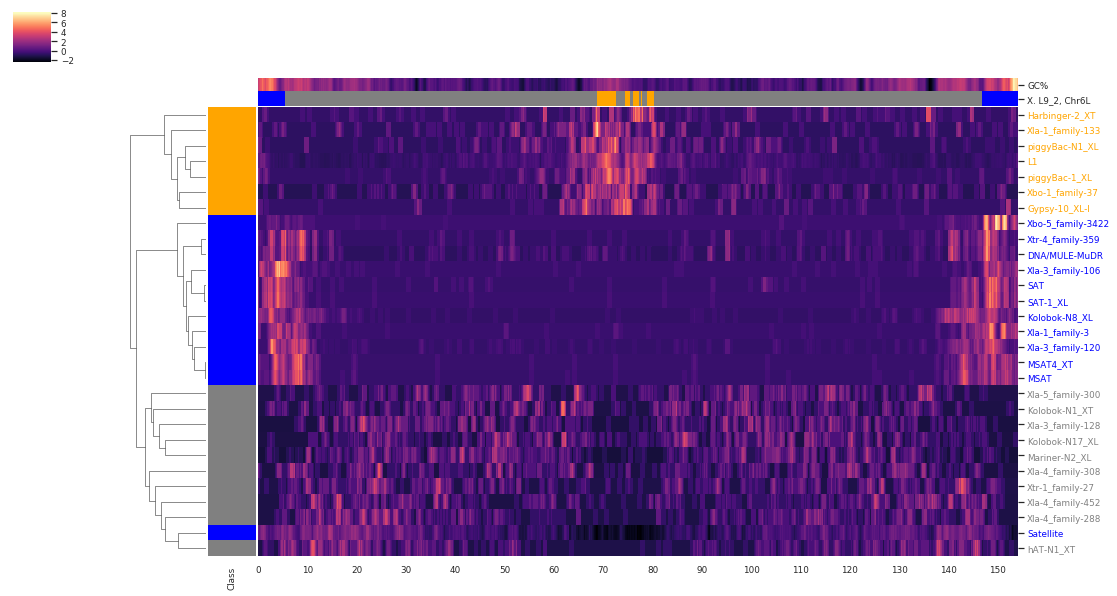

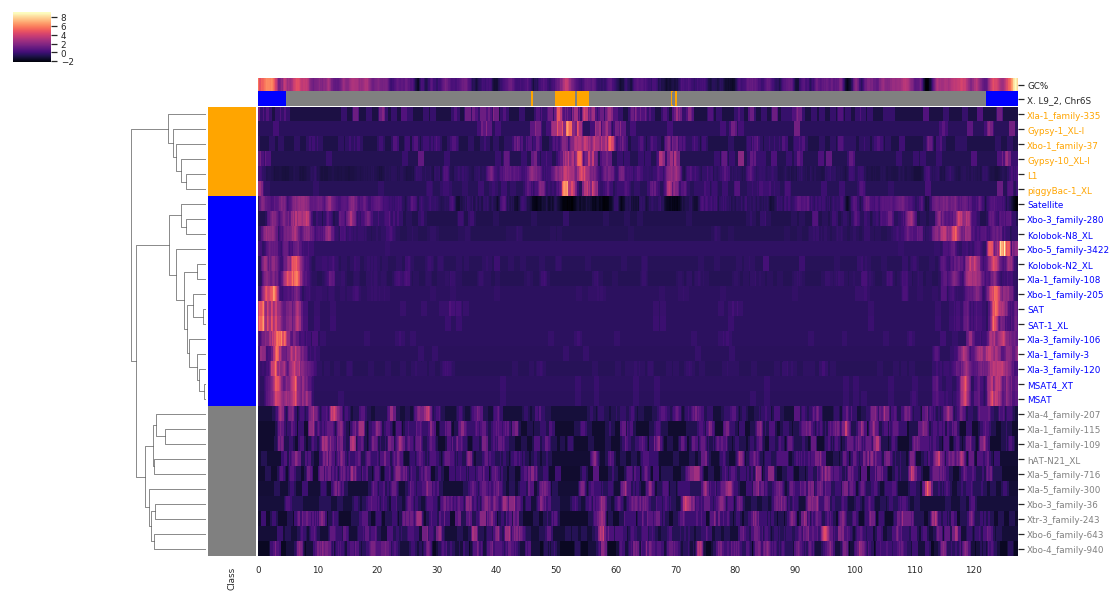

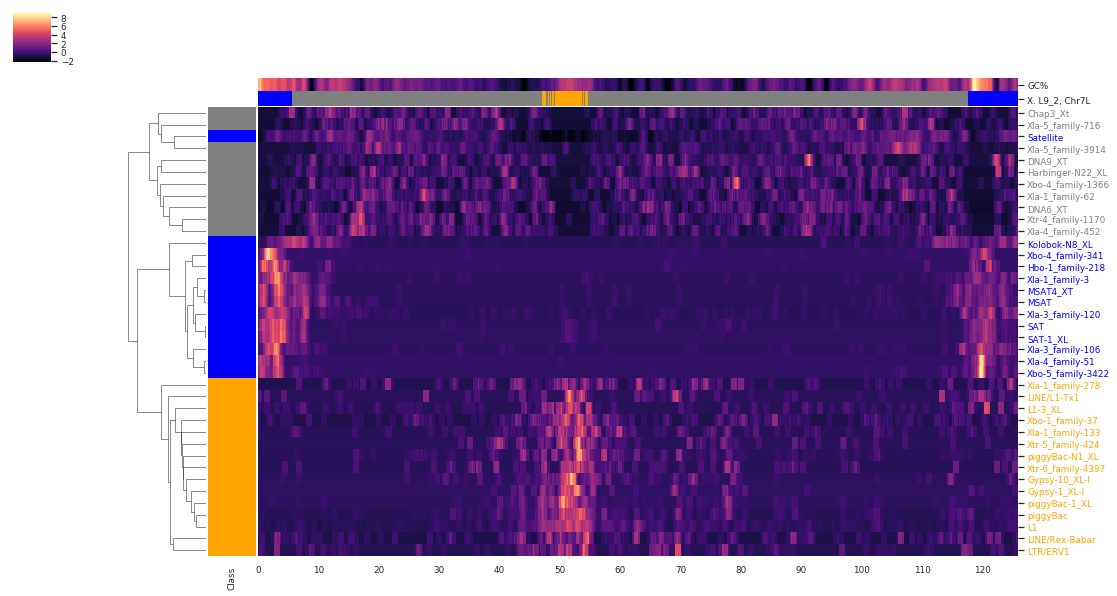

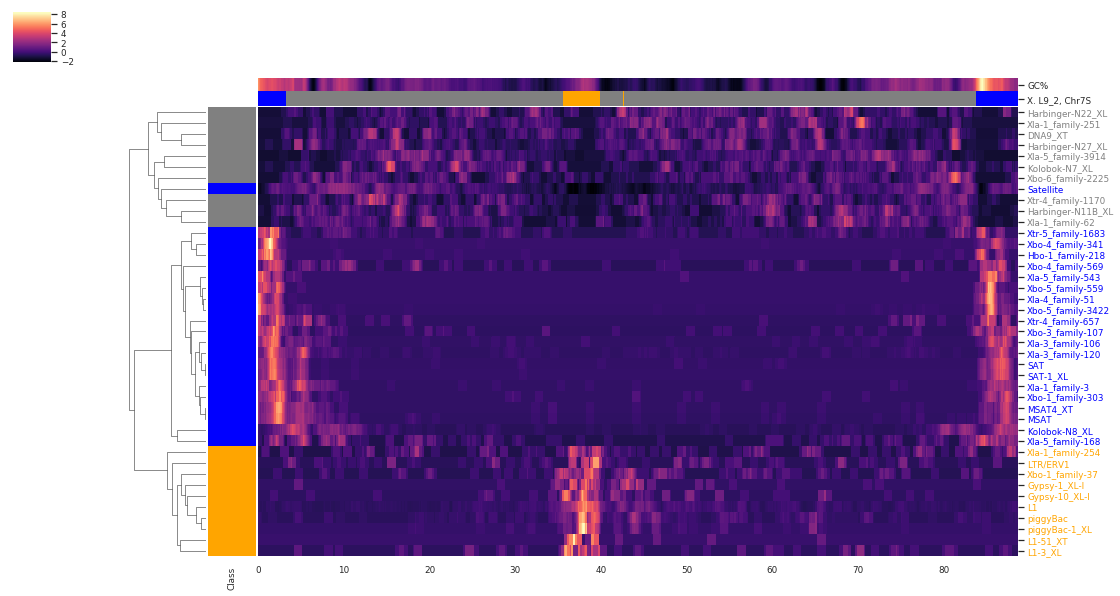

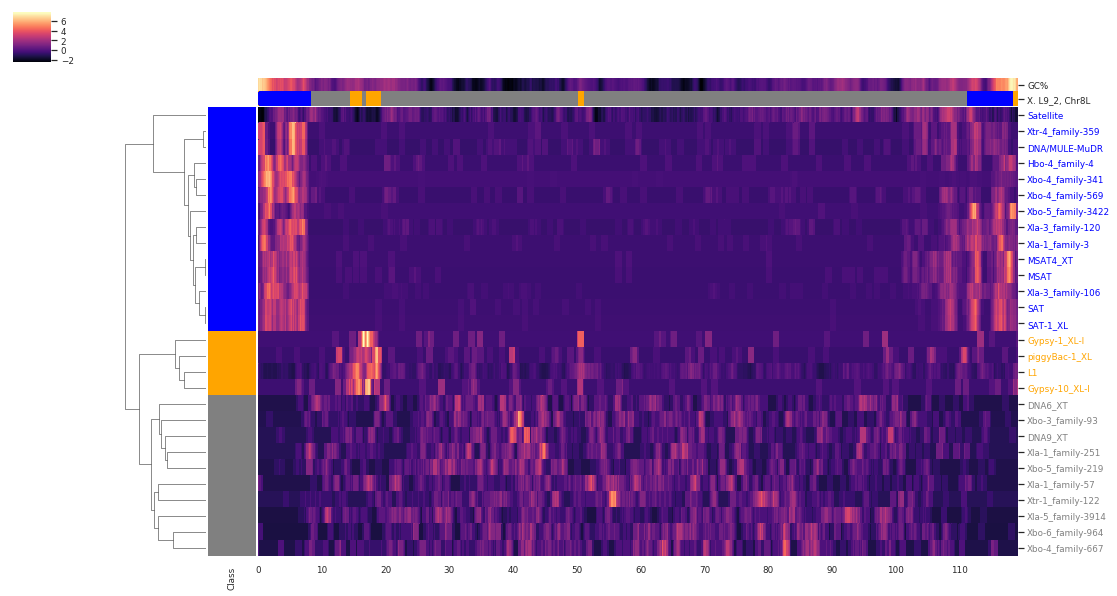

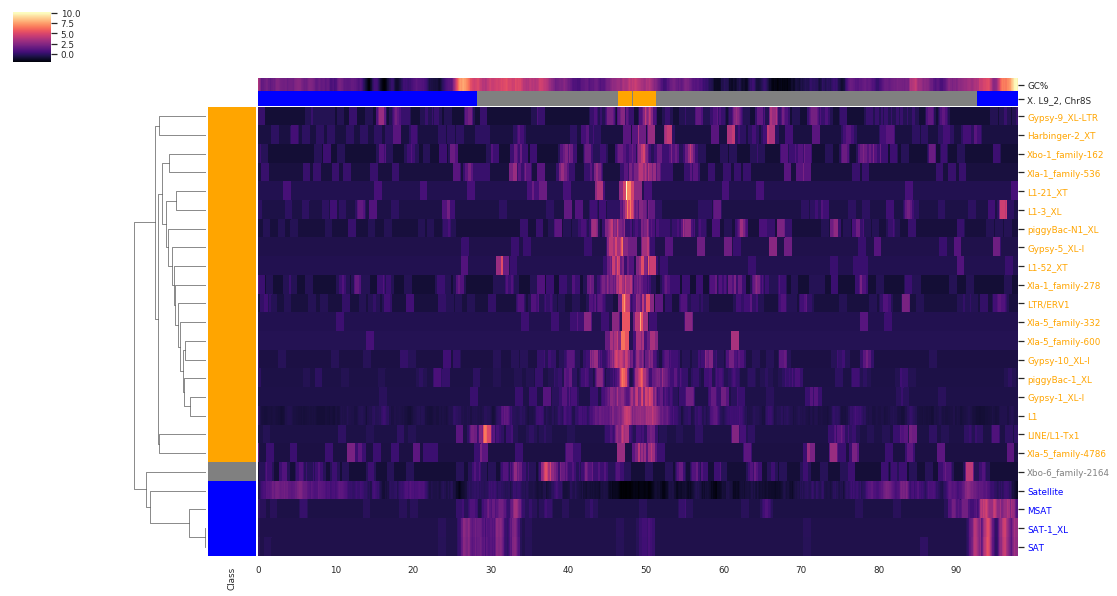

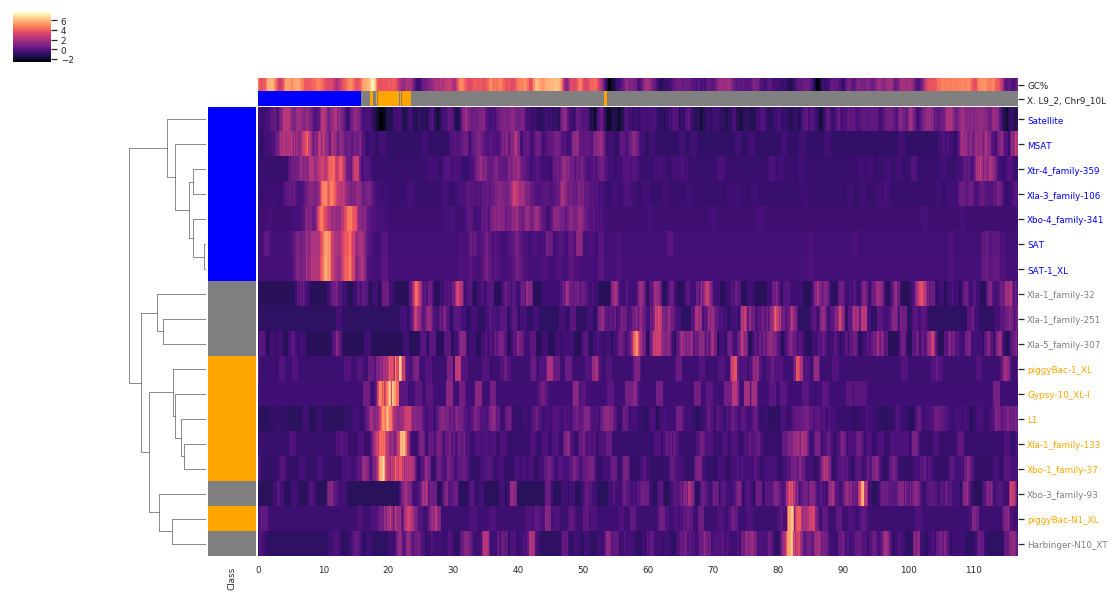

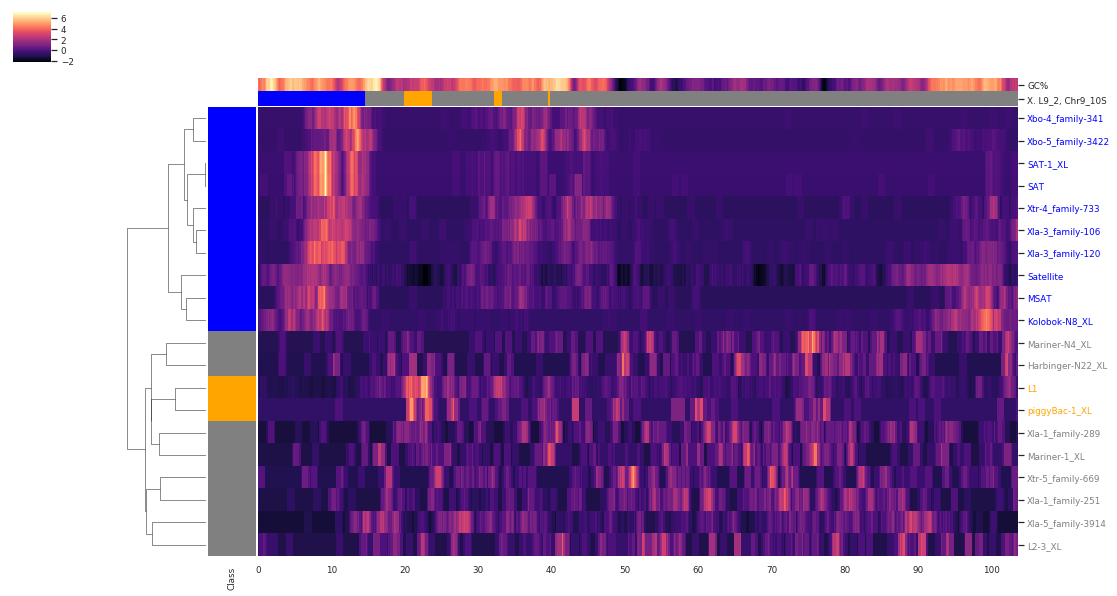

In [14]:
colors_dict_ = {'arm':'gray','Telomere':'blue','Centromere':'orange'}
sns.set(font_scale=.8, context='notebook', style='white')

color_chosen ='magma'

def top_centr_telom(Chr_, region, cent_id, tel_id, arms_id): #cent_id=2; tel_id=0
    Centromere_Y = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==cent_id, list_of_repeats].median())
    Centromere_N = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[~(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==cent_id), list_of_repeats].median())
    Centromere_enrichment = pd.merge(Centromere_Y,Centromere_N, left_index=True, right_index=True, how='outer').fillna(0)
    Centromere_enrichment = Centromere_enrichment.rename(columns={'0_x':'In','0_y':'Out'})
    Centromere_enrichment['Ratio'] = Centromere_enrichment.In*100/(Centromere_enrichment.Out+ Centromere_enrichment.In)
    Rep_Centromere_list = Centromere_enrichment[(Centromere_enrichment['Ratio'] >97 ) & (Centromere_enrichment['In'] >.6 ) ].sort_values(by=['In','Ratio'], ascending=False).head(20).index.to_list()
    Rep_Centromere_list = list(set(Rep_Centromere_list))
    
    Telomere_Y = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==tel_id, list_of_repeats].median())
    Telomere_N = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[~(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==tel_id), list_of_repeats].median())
    Telomere_enrichment = pd.merge(Telomere_Y,Telomere_N, left_index=True, right_index=True, how='outer').fillna(0)
    Telomere_enrichment = Telomere_enrichment.rename(columns={'0_x':'In','0_y':'Out'})
    Telomere_enrichment['Ratio'] = Telomere_enrichment.In*100/(Telomere_enrichment.Out+ Telomere_enrichment.In)
    Rep_Telomere_list = Telomere_enrichment[(Telomere_enrichment['Ratio'] >97 ) & (Telomere_enrichment['In'] >.6 )].sort_values(by=['In','Ratio'], ascending=False).head(20).index.to_list()
    Rep_Telomere_list = list(set(Rep_Telomere_list))
    
    Arms_Y = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==arms_id, list_of_repeats].median())
    Arms_N = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[~(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==arms_id), list_of_repeats].median())
    Arms_enrichment = pd.merge(Arms_Y,Arms_N, left_index=True, right_index=True, how='outer').fillna(0)
    Arms_enrichment = Arms_enrichment.rename(columns={'0_x':'In','0_y':'Out'})
    Arms_enrichment['Ratio'] = Arms_enrichment.In*100/(Arms_enrichment.Out+ Arms_enrichment.In)
    Rep_Arms_list = Arms_enrichment[(Arms_enrichment['Ratio'] >97 ) & (Arms_enrichment['In'] >.05 )].sort_values(by=['In','Ratio'], ascending=False).head(10).index.to_list()
    Rep_Arms_list = list(set(Rep_Arms_list))
    return(Rep_Centromere_list,Rep_Telomere_list,Rep_Arms_list)

def draw_clustermap(Chr_, Specie_name):
    #plt.figure(figsize=(20,8))
    Region_to_display = 'Region'
    min_z_score =3
    min_num_reads =50
    (cen_reps, tel_reps, arm_reps) = top_centr_telom(Chr_, Region_to_display, 'Centromere', 'Telomere', 'arm')
    cen_reps = list(set(cen_reps + [Cen_rep,'L1' ,'piggyBac-1_XL']))
    tel_reps = list(set(tel_reps + [Tel_rep,'SAT','Satellite','MSAT']))
    arm_reps = list(set(arm_reps))
    Rep_to_plot = list(set(cen_reps+ tel_reps + arm_reps))
    Chr1_pad = copy.copy(Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC.Chr==Chr_][['position']+Rep_to_plot]).reset_index()
    Chr1_pad['position'] = (Chr1_pad.position/Mb).astype(int)
    Chr1_pad = Chr1_pad[Rep_to_plot].T
    Chr1_pad = Chr1_pad[Chr1_pad.T.sum()>min_num_reads]
    title= ', '.join((Specie_name, Chr_))
    variable_reps = Chr1_pad.T.sum()[Chr1_pad.T.sum()>10].index.tolist()
    norm = mpl.colors.Normalize(vmin=Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC['Chr']==Chr_]['GC%'].min(), vmax=Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC['Chr']==Chr_]['GC%'].max())
    
    cmap = cm.get_cmap(color_chosen)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    GC_content  = m.to_rgba(Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC['Chr']==Chr_]['GC%'])
    Chr_region  = Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC.Chr==Chr_][Region_to_display].map(colors_dict_).tolist()
    
    row_colors_multiple = pd.DataFrame({title : Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC.Chr==Chr_][Region_to_display].map(colors_dict_).tolist(),
                                   'GC%': m.to_rgba(Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC['Chr']==Chr_]['GC%']).tolist()})
    
    Colors_reps = pd.DataFrame.from_dict(dict(zip(arm_reps + cen_reps+tel_reps , ['gray']*len(arm_reps)+['orange']*len(cen_reps)+['blue']*len(tel_reps))), orient='index')
    Colors_reps = Colors_reps.rename(columns={0:'Class'})
    Colors_reps = Colors_reps.loc[Rep_to_plot]
    
    g = sns.clustermap(Chr1_pad, row_cluster=True,  col_cluster=False, annot_kws={"size": 3}, figsize=(18,10), xticklabels=True, method='average',  metric='correlation', col_colors=row_colors_multiple, row_colors=Colors_reps['Class'] , cmap=color_chosen, z_score=0)
    g.ax_row_dendrogram.set_xlim([3,0])
    
    for tick_label in g.ax_heatmap.axes.get_yticklabels():
        tick_label.set_color(Colors_reps.loc[tick_label.get_text()].Class)
    
    Chr_pos = copy.copy(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][['position']])
    Chr_pos['Mb'] = Chr_pos.position.apply(lambda x: x/Mb if np.mod(x,10*Mb)==0 else '')
    g.ax_heatmap.axes.set_xticklabels(Chr_pos['Mb'])
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
    figure_name = ''.join((out_dir,Specie_id,'_',Chr_,'_Density_heatmap.png'))
    plt.savefig(figure_name, dpi=200)
    plt.show()
    

for Chr_ in ordered_chromosomes:
    draw_clustermap(Chr_, Specie_name)

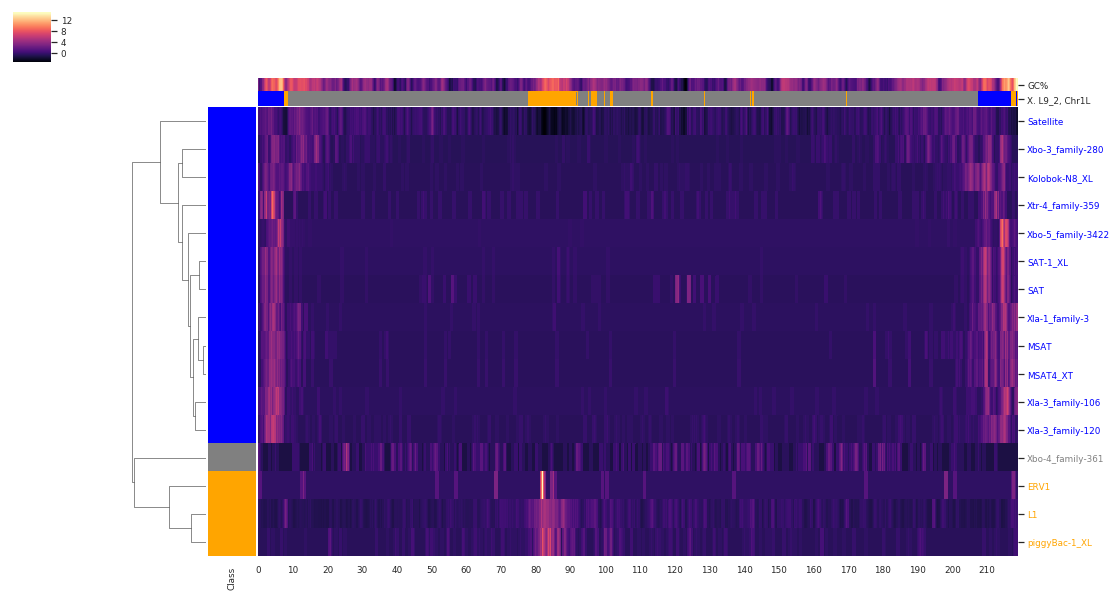

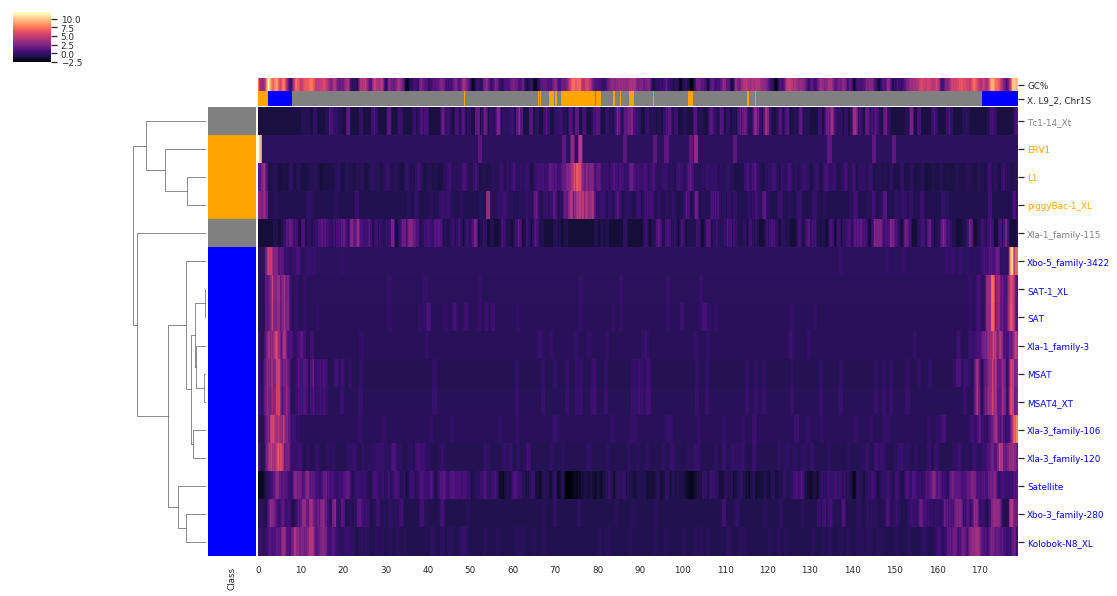

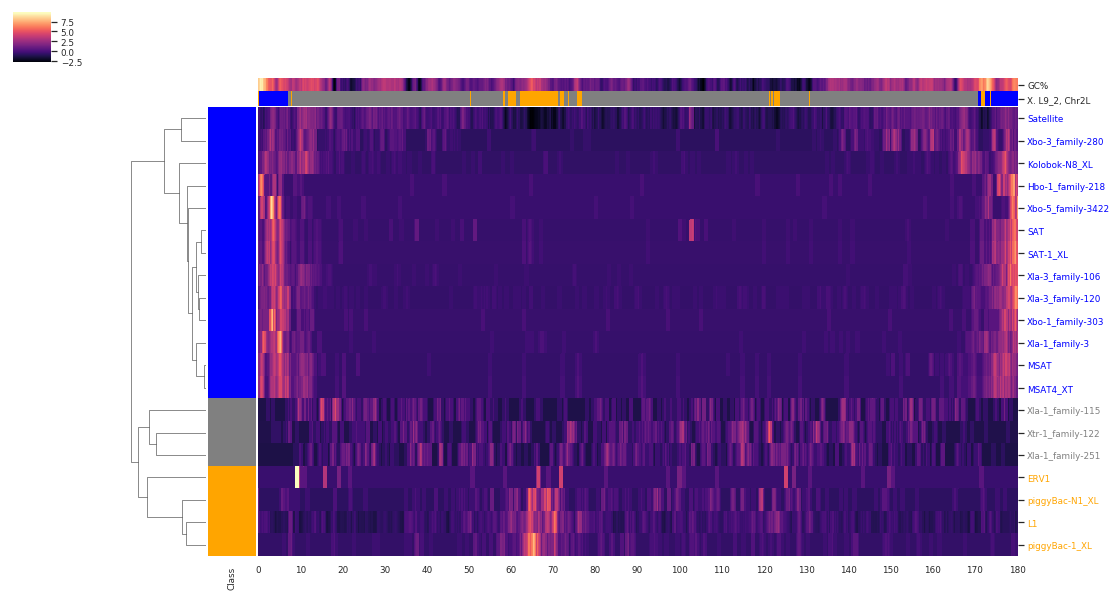

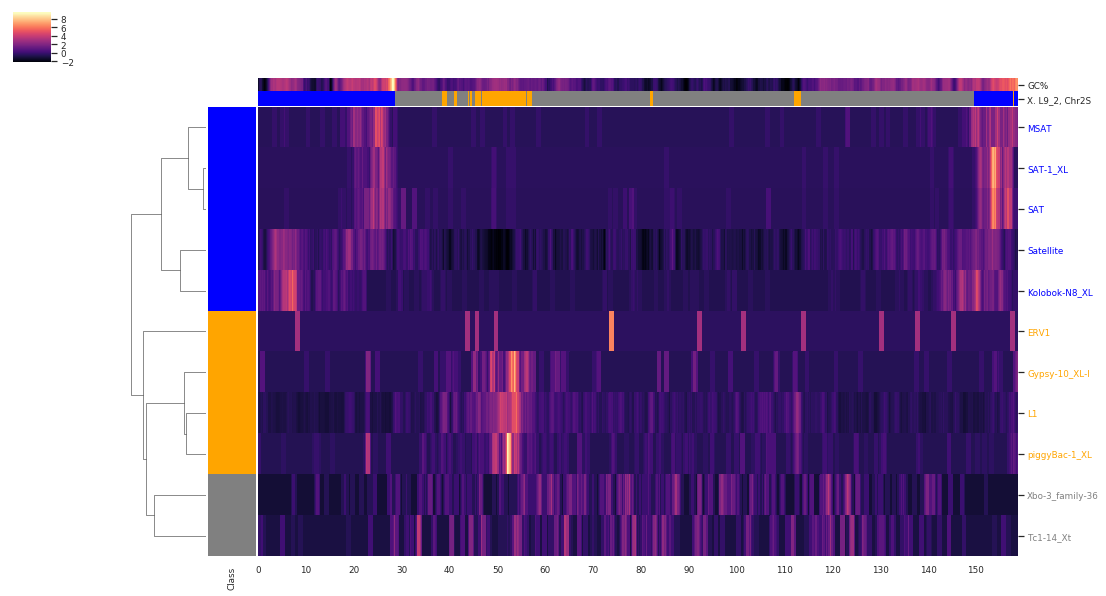

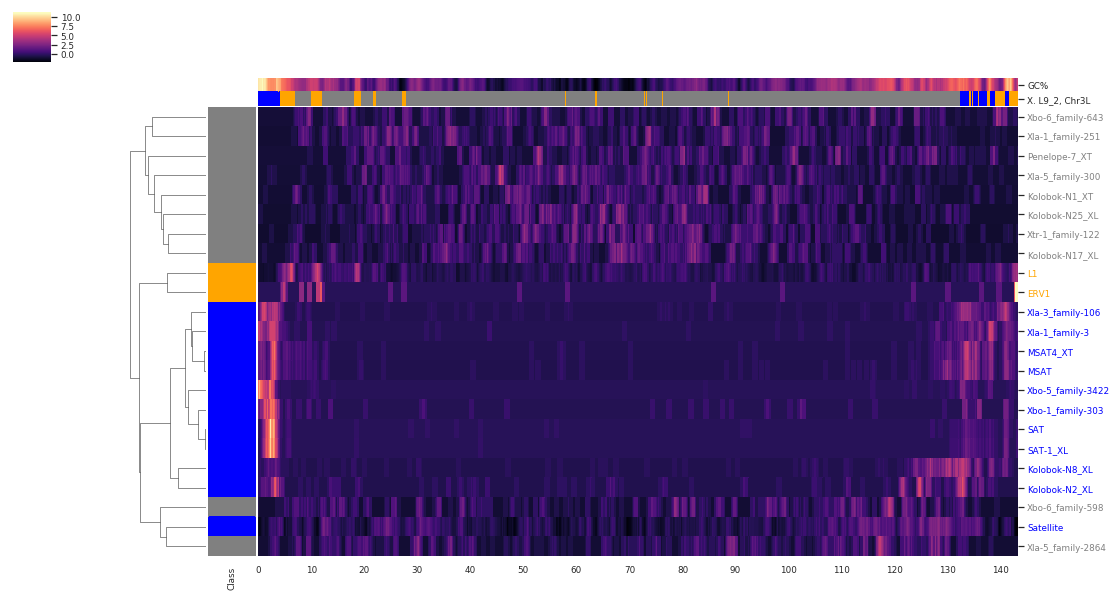

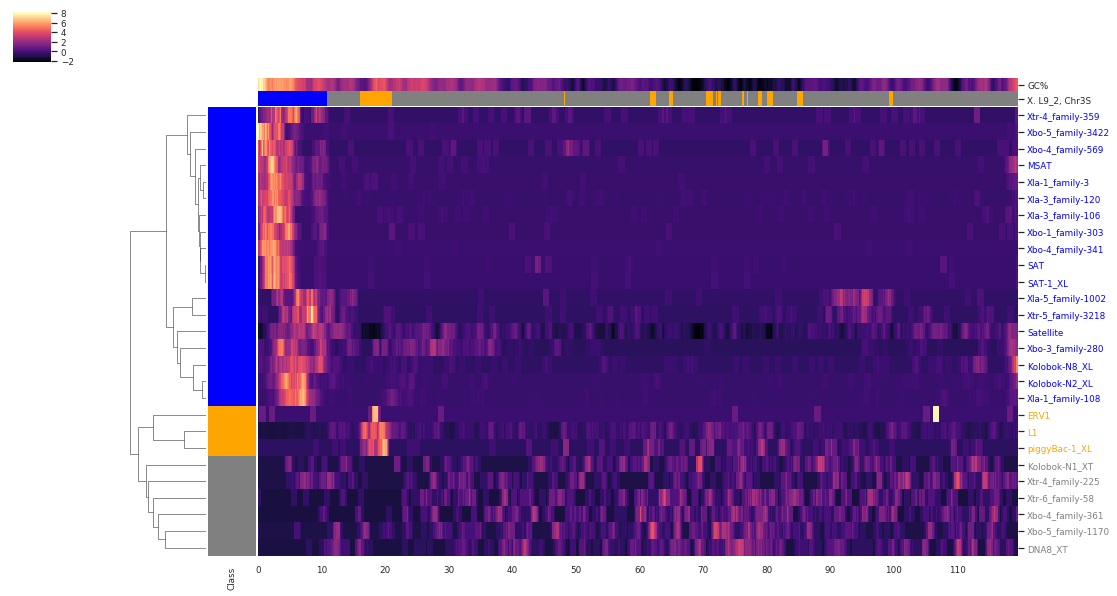

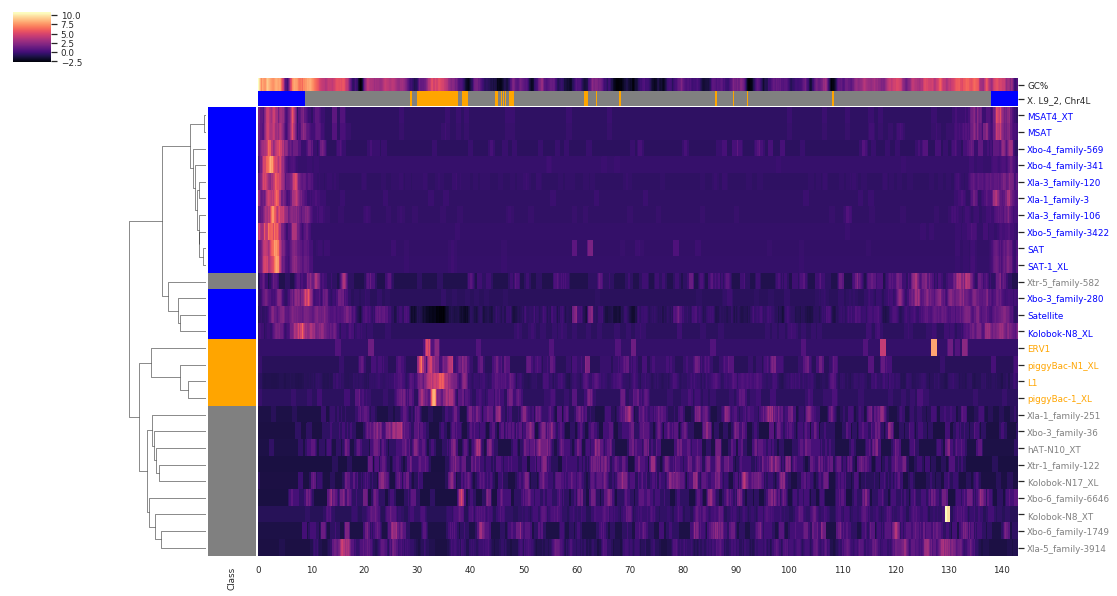

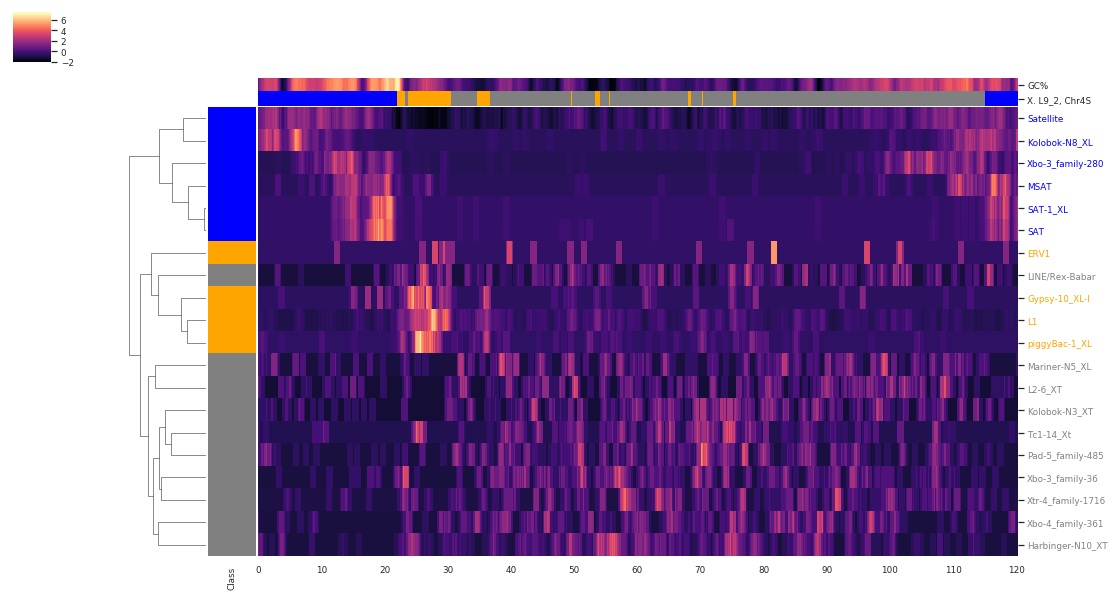

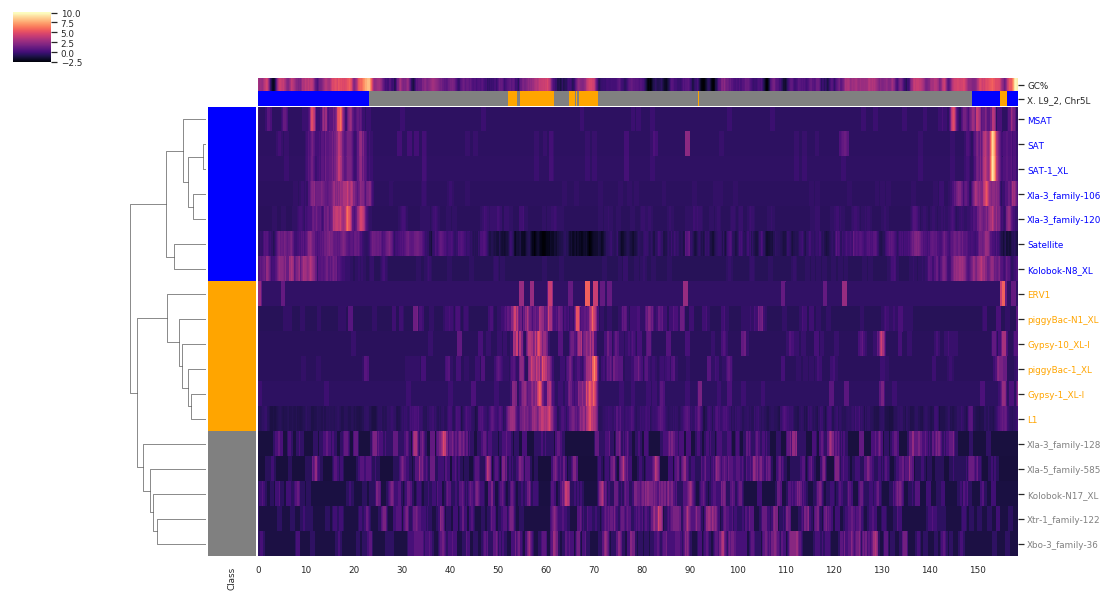

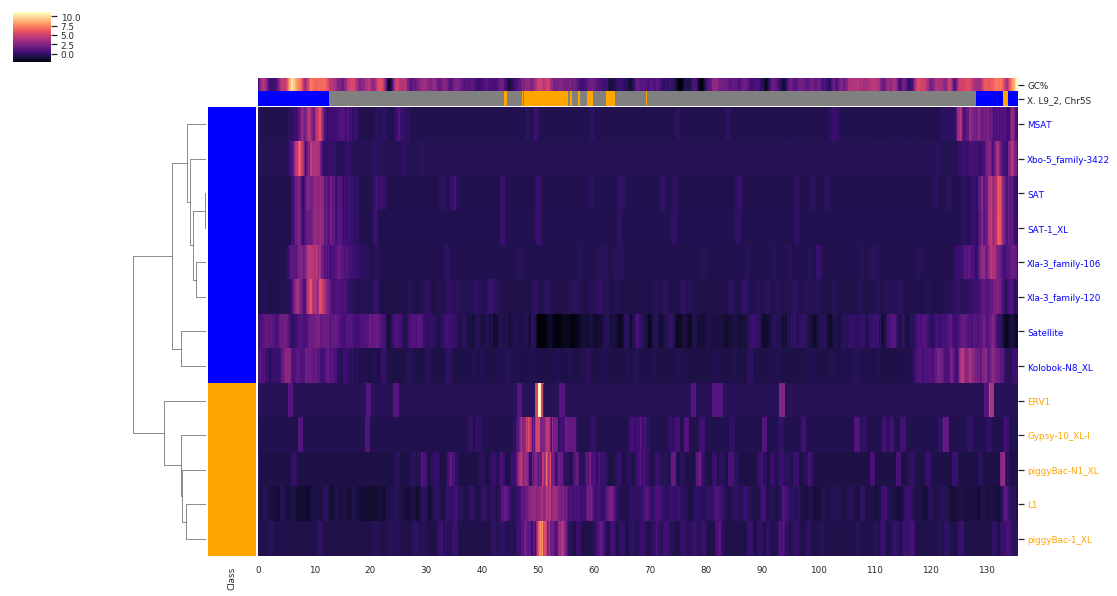

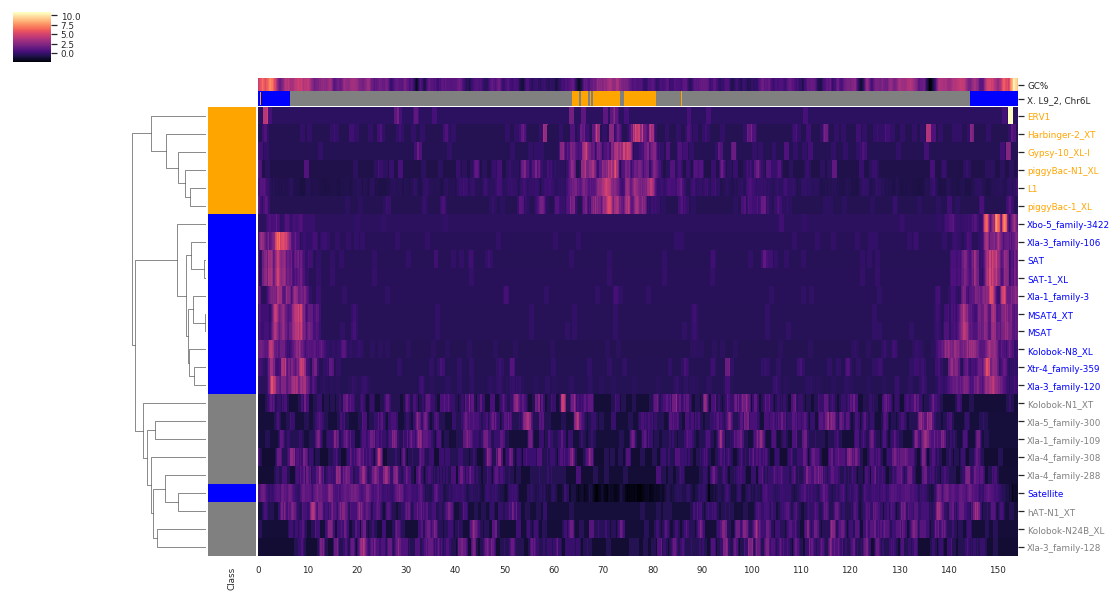

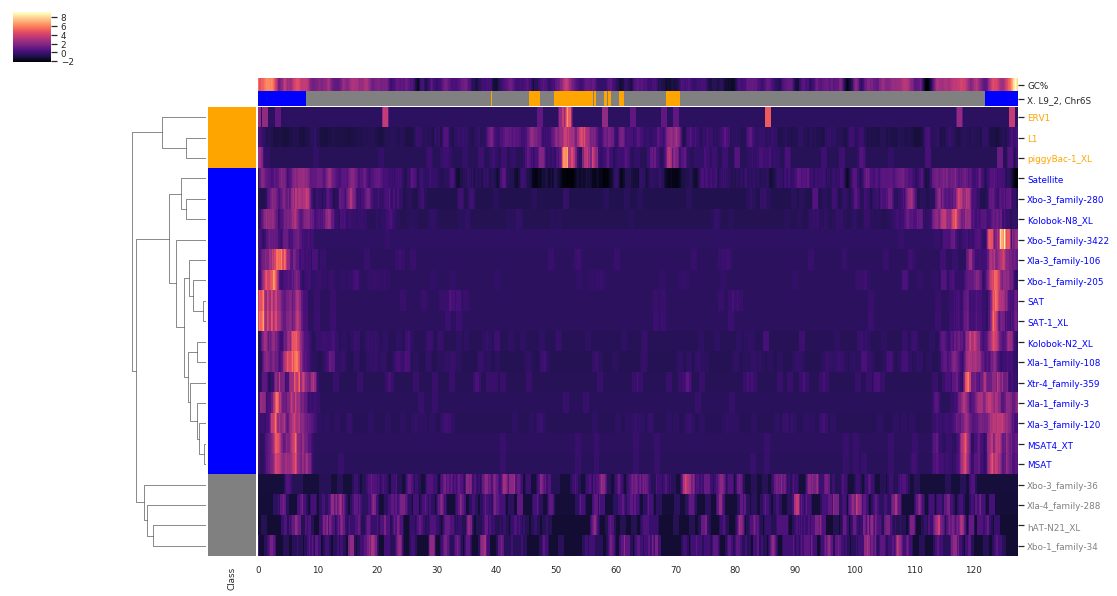

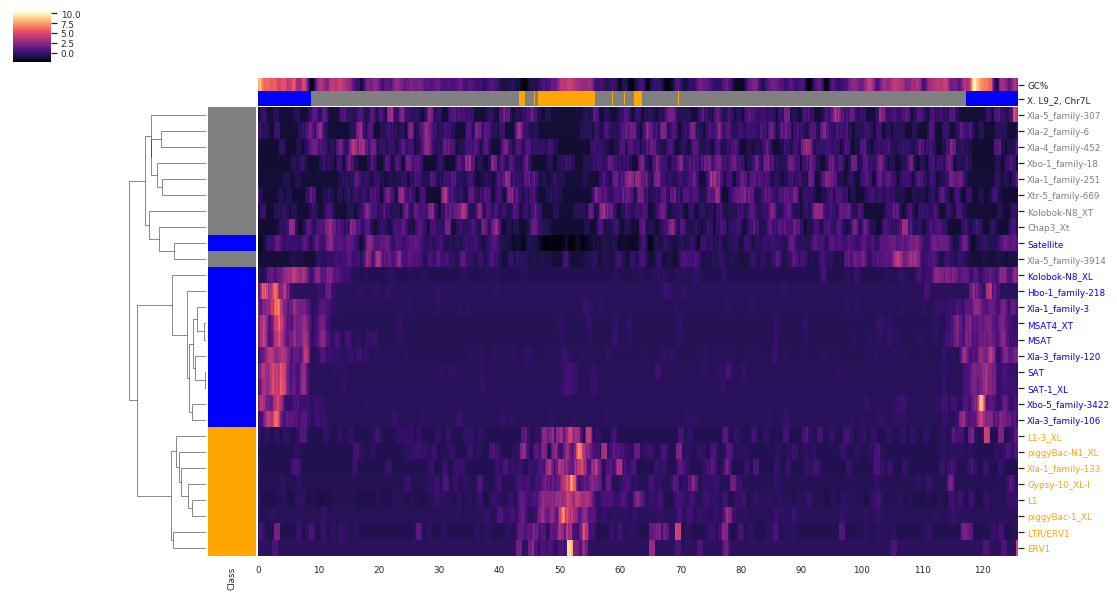

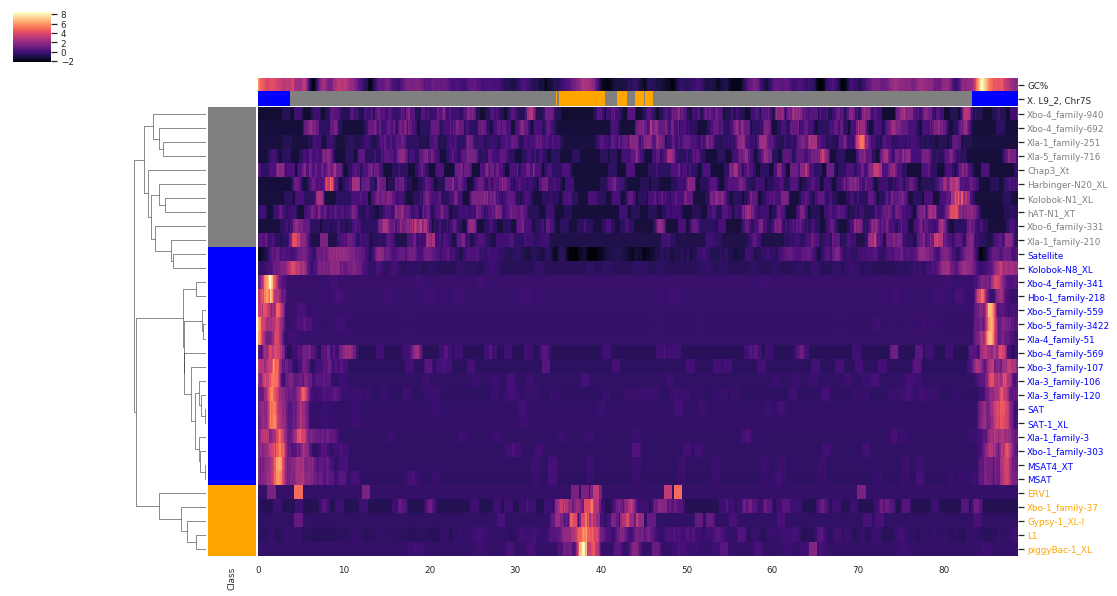

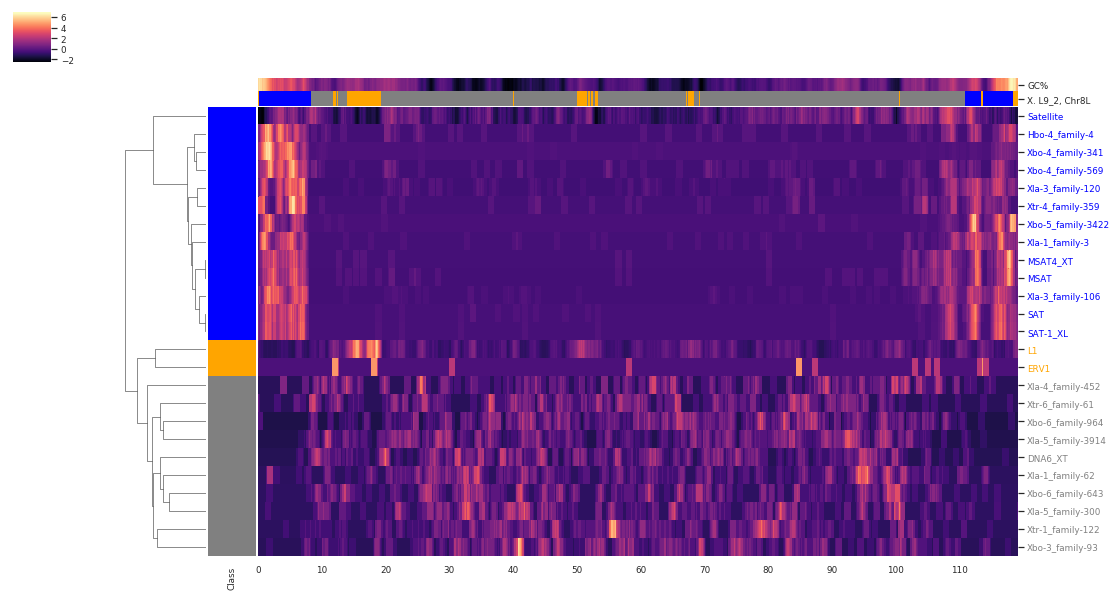

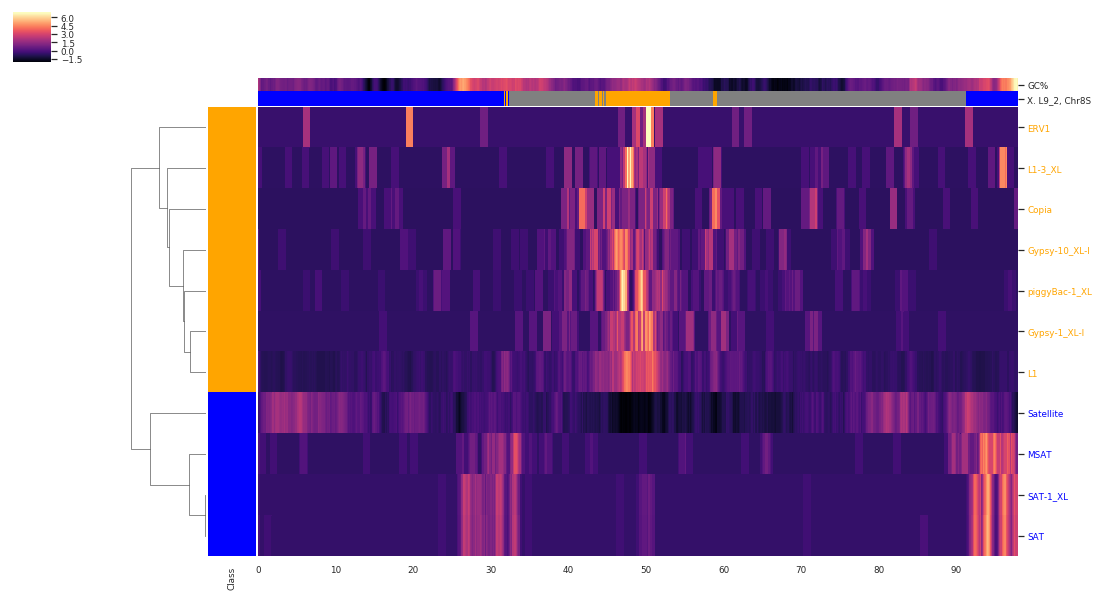

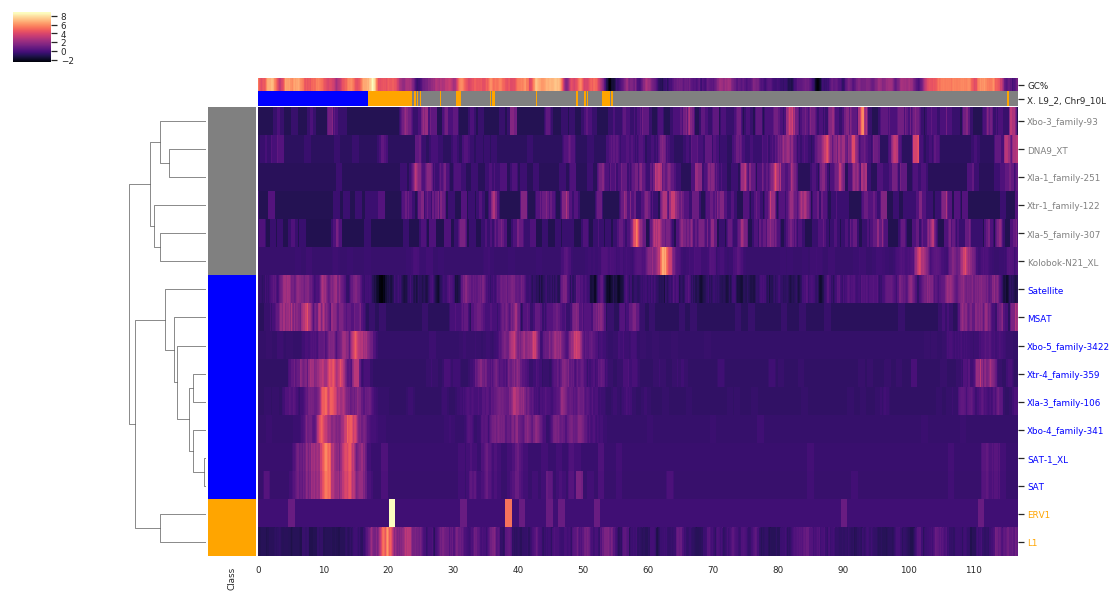

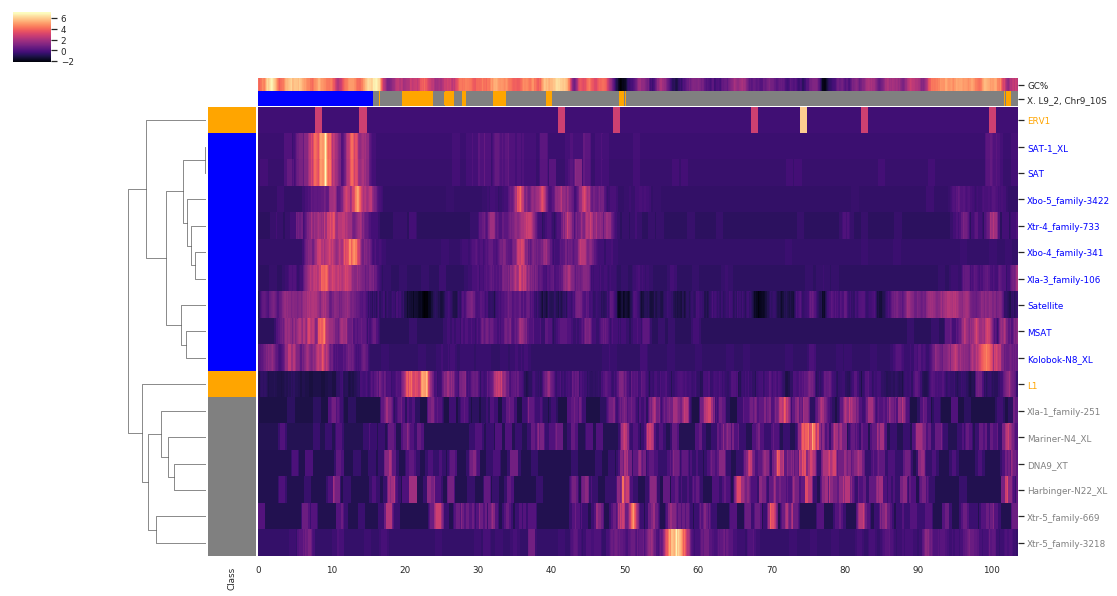

In [7]:
colors_dict_ = {'arm':'gray','Telomere':'blue','Centromere':'orange'}
sns.set(font_scale=.8, context='notebook', style='white')

color_chosen ='magma'

def top_centr_telom(Chr_, region, cent_id, tel_id, arms_id): #cent_id=2; tel_id=0
    Centromere_Y = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==cent_id, list_of_repeats].median())
    Centromere_N = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[~(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==cent_id), list_of_repeats].median())
    Centromere_enrichment = pd.merge(Centromere_Y,Centromere_N, left_index=True, right_index=True, how='outer').fillna(0)
    Centromere_enrichment = Centromere_enrichment.rename(columns={'0_x':'In','0_y':'Out'})
    Centromere_enrichment['Ratio'] = Centromere_enrichment.In*100/(Centromere_enrichment.Out+ Centromere_enrichment.In)
    Rep_Centromere_list = Centromere_enrichment[(Centromere_enrichment['Ratio'] >97 ) & (Centromere_enrichment['In'] >.6 ) ].sort_values(by=['In','Ratio'], ascending=False).head(20).index.to_list()
    Rep_Centromere_list = list(set(Rep_Centromere_list))
    
    Telomere_Y = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==tel_id, list_of_repeats].median())
    Telomere_N = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[~(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==tel_id), list_of_repeats].median())
    Telomere_enrichment = pd.merge(Telomere_Y,Telomere_N, left_index=True, right_index=True, how='outer').fillna(0)
    Telomere_enrichment = Telomere_enrichment.rename(columns={'0_x':'In','0_y':'Out'})
    Telomere_enrichment['Ratio'] = Telomere_enrichment.In*100/(Telomere_enrichment.Out+ Telomere_enrichment.In)
    Rep_Telomere_list = Telomere_enrichment[(Telomere_enrichment['Ratio'] >97 ) & (Telomere_enrichment['In'] >.6 )].sort_values(by=['In','Ratio'], ascending=False).head(20).index.to_list()
    Rep_Telomere_list = list(set(Rep_Telomere_list))
    
    Arms_Y = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==arms_id, list_of_repeats].median())
    Arms_N = pd.DataFrame(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_].loc[~(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][region]==arms_id), list_of_repeats].median())
    Arms_enrichment = pd.merge(Arms_Y,Arms_N, left_index=True, right_index=True, how='outer').fillna(0)
    Arms_enrichment = Arms_enrichment.rename(columns={'0_x':'In','0_y':'Out'})
    Arms_enrichment['Ratio'] = Arms_enrichment.In*100/(Arms_enrichment.Out+ Arms_enrichment.In)
    Rep_Arms_list = Arms_enrichment[(Arms_enrichment['Ratio'] >97 ) & (Arms_enrichment['In'] >.1 )].sort_values(by=['In','Ratio'], ascending=False).head(10).index.to_list()
    Rep_Arms_list = list(set(Rep_Arms_list))
    return(Rep_Centromere_list,Rep_Telomere_list,Rep_Arms_list)

def draw_clustermap(Chr_, Specie_name):
    #plt.figure(figsize=(20,8))
    Region_to_display = 'Region'
    min_z_score =3
    min_num_reads =50
    (cen_reps, tel_reps, arm_reps) = top_centr_telom(Chr_, Region_to_display, 'Centromere', 'Telomere', 'arm')
    cen_reps = list(set(cen_reps + [Cen_rep,'L1' ,'piggyBac-1_XL']))
    tel_reps = list(set(tel_reps + [Tel_rep,'SAT','Satellite','MSAT']))
    arm_reps = list(set(arm_reps))
    Rep_to_plot = list(set(cen_reps+ tel_reps + arm_reps))
    Chr1_pad = copy.copy(Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC.Chr==Chr_][['position']+Rep_to_plot]).reset_index()
    Chr1_pad['position'] = (Chr1_pad.position/Mb).astype(int)
    Chr1_pad = Chr1_pad[Rep_to_plot].T
    Chr1_pad = Chr1_pad[Chr1_pad.T.sum()>min_num_reads]
    title= ', '.join((Specie_name, Chr_))
    variable_reps = Chr1_pad.T.sum()[Chr1_pad.T.sum()>10].index.tolist()
    norm = mpl.colors.Normalize(vmin=Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC['Chr']==Chr_]['GC%'].min(), vmax=Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC['Chr']==Chr_]['GC%'].max())
    
    cmap = cm.get_cmap(color_chosen)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    GC_content  = m.to_rgba(Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC['Chr']==Chr_]['GC%'])
    Chr_region  = Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC.Chr==Chr_][Region_to_display].map(colors_dict_).tolist()
    
    row_colors_multiple = pd.DataFrame({title : Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC.Chr==Chr_][Region_to_display].map(colors_dict_).tolist(),
                                   'GC%': m.to_rgba(Xtropicalis_repeat_Class_and_GC[Xtropicalis_repeat_Class_and_GC['Chr']==Chr_]['GC%']).tolist()})
    
    Colors_reps = pd.DataFrame.from_dict(dict(zip(arm_reps + cen_reps+tel_reps , ['gray']*len(arm_reps)+['orange']*len(cen_reps)+['blue']*len(tel_reps))), orient='index')
    Colors_reps = Colors_reps.rename(columns={0:'Class'})
    Colors_reps = Colors_reps.loc[Rep_to_plot]
    
    g = sns.clustermap(Chr1_pad, row_cluster=True,  col_cluster=False, annot_kws={"size": 3}, figsize=(18,10), xticklabels=True, method='average',  metric='correlation', col_colors=row_colors_multiple, row_colors=Colors_reps['Class'] , cmap=color_chosen, z_score=0)
    g.ax_row_dendrogram.set_xlim([3,0])
    
    for tick_label in g.ax_heatmap.axes.get_yticklabels():
        tick_label.set_color(Colors_reps.loc[tick_label.get_text()].Class)
    
    Chr_pos = copy.copy(Xtropicalis_repeat_Class_and_GC_norm_byChr[Xtropicalis_repeat_Class_and_GC_norm_byChr.Chr==Chr_][['position']])
    Chr_pos['Mb'] = Chr_pos.position.apply(lambda x: x/Mb if np.mod(x,10*Mb)==0 else '')
    g.ax_heatmap.axes.set_xticklabels(Chr_pos['Mb'])
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
    figure_name = ''.join((out_dir,Specie_id,'_',Chr_,'_Density_heatmap.png'))
    plt.savefig(figure_name, dpi=200)
    plt.show()
    

for Chr_ in ordered_chromosomes:
    draw_clustermap(Chr_, Specie_name)